# S&P 500 5-Year Historical Analysis - Amazon, Apple & Netflix (2015-2020)

## Importing The Data

Here I use a function, `get`, which, using the ticker, start, and end dates for the required data, uses pandas-datareader to pull the stock data from Yahoo! Finance, and then uses Pandas to put it into a DataFrame called `all_data` - this orders the data by date whilst separating it by ticker (note that the ^GSPC ticker represents the S&P 500 index on Yahoo! Finance). Then running `all_data.head()` shows the first few line of this DataFrame to show how it is formatted:

In [1]:
import pandas_datareader as pdr
import pandas as pd
import datetime 


def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map(data, tickers)
    return (pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))


tickers = ['AAPL', 'AMZN', 'NFLX', '^GSPC']
all_data = get(tickers, datetime.datetime(2015, 1, 1), datetime.datetime(2019, 12, 31))
all_data.head()

High         Low        Open       Close      Volume  \
Ticker Date                                                                     
AAPL   2015-01-02  111.440002  107.349998  111.389999  109.330002  53204600.0   
       2015-01-05  108.650002  105.410004  108.290001  106.250000  64285500.0   
       2015-01-06  107.430000  104.629997  106.540001  106.260002  65797100.0   
       2015-01-07  108.199997  106.699997  107.199997  107.750000  40105900.0   
       2015-01-08  112.150002  108.699997  109.230003  111.889999  59364500.0   

                    Adj Close  
Ticker Date                    
AAPL   2015-01-02   99.945885  
       2015-01-05   97.130241  
       2015-01-06   97.139420  
       2015-01-07   98.501518  
       2015-01-08  102.286186

Then below, I create a separate DataFrame for each stock using the `loc` function, so that I am able to easily use the data for an individual stock where necessary:

In [2]:
amzn_data = all_data.loc['AMZN']
aapl_data = all_data.loc['AAPL']
nflx_data = all_data.loc['NFLX']
snp500_data = all_data.loc['^GSPC']

-------

## Stock Price Analysis

### Daily Close Price

I take the close price data from `all_data`, and use `pivot()` to reshape the data into the pivot table `stock_close_price`, which will help for the subsequent data visualisation:

In [3]:
stock_close_price = all_data['Close'].reset_index().pivot('Date', 'Ticker', 'Close')
stock_close_price.head()

Ticker,AAPL,AMZN,NFLX,^GSPC
Date,,,,
2015-01-02,109.330002,308.519989,49.848572,2058.199951
2015-01-05,106.250000,302.190002,47.311428,2020.579956
2015-01-06,106.260002,295.290009,46.501427,2002.609985
2015-01-07,107.750000,298.420013,46.742859,2025.900024
2015-01-08,111.889999,300.459991,47.779999,2062.139893


Then, using `matplotlib.pyplot`, I plot this daily closing price over the 5-year period for each of the stocks, as well as the market index:

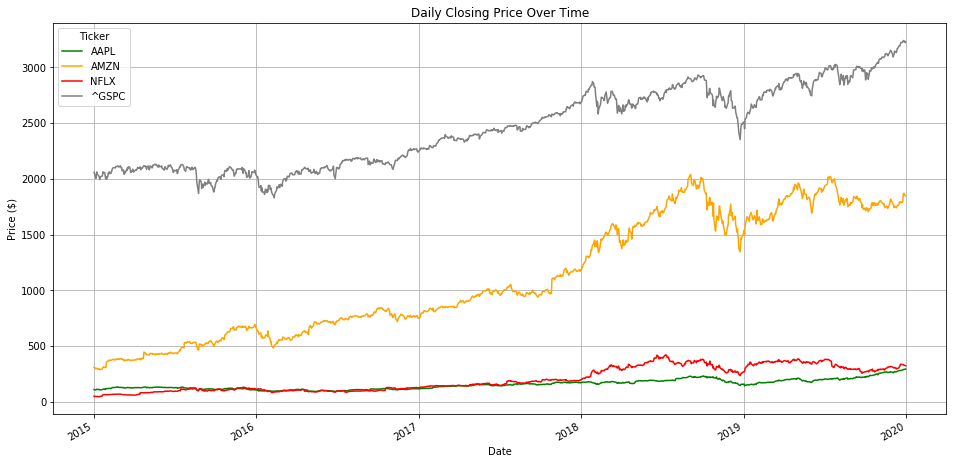

In [4]:
import matplotlib.pyplot as plt

stock_close_price.plot(color=['green', 'orange', 'red', 'grey'], figsize=(16,8))
plt.title('Daily Closing Price Over Time')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

*While stock price tells us little by itself, we can at least see that there is some level of correlation between the 3 stocks and the market index; particularly visible for instance towards the end of 2018. The prices for all 3 stocks and the market as a whole are on a net uptrend over the 5-year period examined. While Amazon's price appears to increase the most, increasing 499% over the 5 years, it's important to note that Netflix's price increased 549% during the period, suggesting it may have been the most in-demand. Meanwhile, Apple's price rose 169%, closest to that of the market index which rose just 57% in comparison, suggesting it is more balanced in terms of supply and demand.*

### Scatter Matrix Of Daily Close Prices

I use a scatter matrix to look at the pairwise correlations between stock prices using Pandas: firstly, I isolate the close prices by creating new variables, `stock_close`, then plot the scatter matrix using `concat()` to concatenate the close prices along 1 axis, and use `plotting.scatter_matrix()` to visualise the scatter matrix, that is, the set of pair-wise scatter plots between the stocks:

In [5]:
amzn_close = amzn_data['Close']
aapl_close = aapl_data['Close']
nflx_close = nflx_data['Close']
snp500_close = snp500_data['Close']

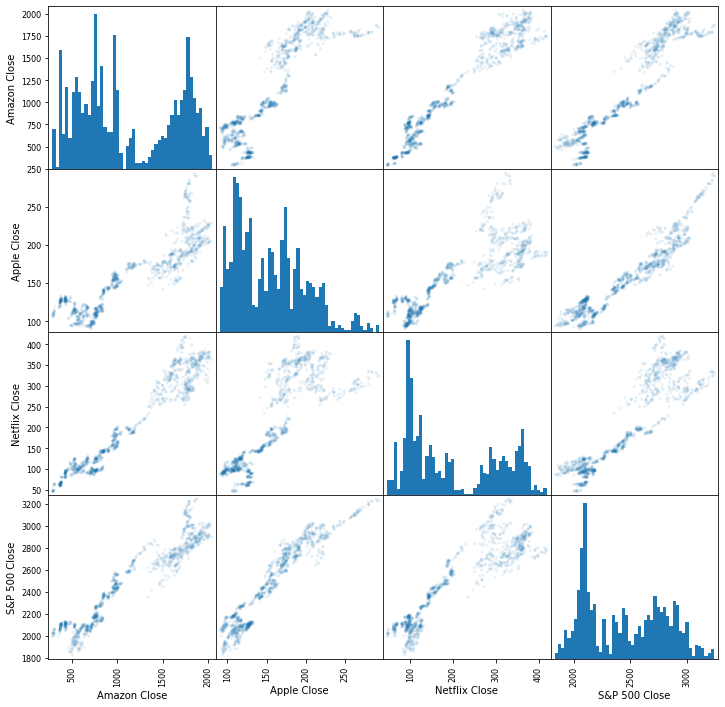

In [6]:
close_comp = pd.concat([amzn_close, aapl_close, nflx_close, snp500_close], axis=1)
close_comp.columns = ['Amazon Close', 'Apple Close', 'Netflix Close', 'S&P 500 Close']
pd.plotting.scatter_matrix(close_comp, hist_kwds={'bins':50}, alpha=0.1, figsize=(12,12))
plt.show() 

*We can see that there appears to be a positive, generally linear correlation between the close prices of all the stocks and market index. The prices of Amazon and Netflix in particular appear to have a strong positive linear association, so knowing price changes in one can be helpful in predicting price changes of the other. Of the 3 stocks, Apple and Netflix appear to have the lowest pair-wise correlation, with a vaguely positive association, but many outliers at the higher range - hence predicting stock price of one, with information on the other, would be less useful. It's important to note also that the prices are not normalised (different prices on different scales), so this must be factored into observations as it may skew the scatter plots.*

### Simple Moving Averages

Here I look at the simple moving windows of each stock, also known as Simple Moving Average (SMA). The formula below shows how to calculate SMA:

$$ {\large SMA=\frac{\sum_{i=1}^{n}A_{i}}{n},} $$
where:
- $ \qquad A_{i}$ = Average price in period i        
- $ \qquad n$ = Number of time periods

I firstly isolate the adjusted close price in variables for each individual stock, `stock_adj_close`, then plot the adjusted close, and a short and long moving average (or window) using `rolling(window).mean()` with 2 different window sizes. This graph is then plotted for each individual stock separately: 

In [7]:
amzn_adj_close = amzn_data['Adj Close']
aapl_adj_close = aapl_data['Adj Close']
nflx_adj_close = nflx_data['Adj Close']
snp500_adj_close = snp500_data['Adj Close']

**Amazon**

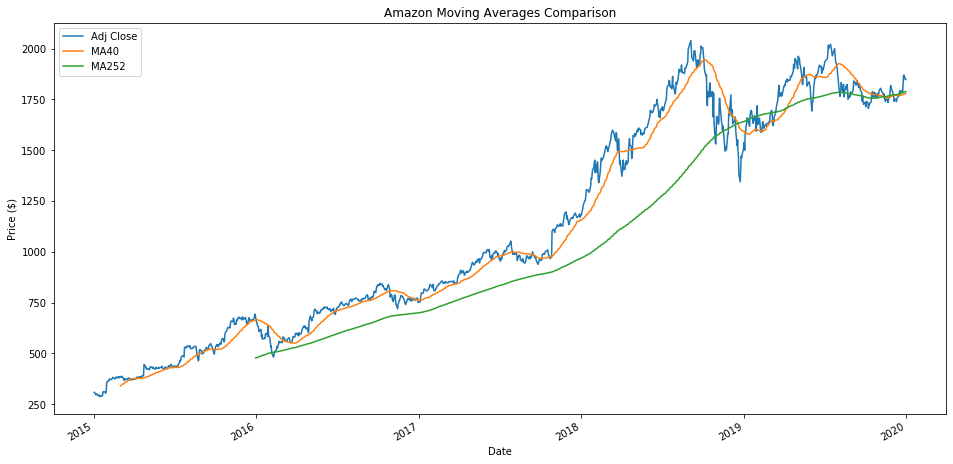

In [8]:
short_window = 40
long_window = 252
stock_adj_close_price = all_data['Adj Close'].reset_index().pivot('Date', 'Ticker', 'Adj Close')
amzn_short_moving_avg = amzn_adj_close.rolling(short_window).mean()
amzn_long_moving_avg = amzn_adj_close.rolling(long_window).mean()

amzn_adj_close.plot(label='Adj Close', figsize=(16,8))
amzn_short_moving_avg.plot(label='MA'+str(short_window))
amzn_long_moving_avg.plot(label='MA'+str(long_window))
plt.title('Amazon Moving Averages Comparison')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

*The adjusted close price for Amazon is generally above both moving averages, despite some dips below, which implies that the stock will likely move higher in price. Towards the end of 2018 it drops under the short moving average, implying it will move lower in price, and it stays well under for a considerable period. In trading, the crossing of short and long term moving averages is a particular point of interest, as it can be used trigger a buy or sell signal for the stock. There are 3 points of moving average crossover: the long moving average crosses above the short moving average on 19/12/18 which would trigger a sell signal, then they crossover again on 09/04/19 which would trigger a buy signal, and finally crossover on 13/11/19 which would trigger another sell signal.*

**Apple**

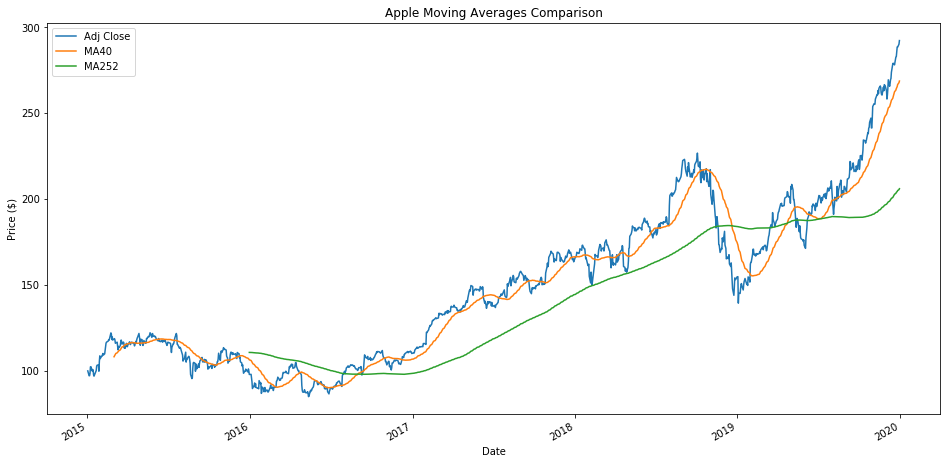

In [9]:
short_window = 40
long_window = 252
aapl_short_moving_avg = aapl_adj_close.rolling(short_window).mean()
aapl_long_moving_avg = aapl_adj_close.rolling(long_window).mean()

aapl_adj_close.plot(label='Adj Close', figsize=(16,8))
aapl_short_moving_avg.plot(label='MA'+str(short_window))
aapl_long_moving_avg.plot(label='MA'+str(long_window))
plt.title('Apple Moving Averages Comparison')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

*For Apple, the adjusted close price and short term average seem to crossover a lot more than with Amazon. The price and averages generally move sideways up until 2017, with an uptrend in price and moving averages from then on. At the end of 2018 there is a sharp drop in price and short moving average, with price staying below the short average for an extended time before crossing back over and signalling a future move up in price - however the long moving average holds steady through this period as it gives us a more long term outlook. There are 3 points of moving average crossover: the short moving average crosses above the long moving average on 31/08/16 which would trigger a buy signal, then they crossover again on 20/12/18 triggering a sell signal, and finally crossing on 24/04/19 triggering a buy signal.*

**Netflix**

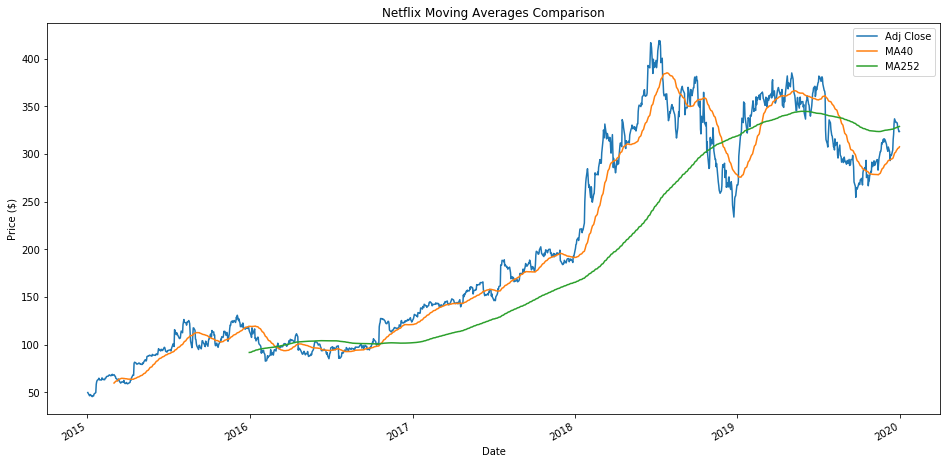

In [10]:
short_window = 40
long_window = 252
nflx_short_moving_avg = nflx_adj_close.rolling(short_window).mean()
nflx_long_moving_avg = nflx_adj_close.rolling(long_window).mean()

nflx_adj_close.plot(label='Adj Close', figsize=(16,8))
nflx_short_moving_avg.plot(label='MA'+str(short_window))
nflx_long_moving_avg.plot(label='MA'+str(long_window))
plt.title('Netflix Moving Averages Comparison')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

*For Netflix, the adjusted closing price and averages initially move upwards, then sideways until the start of 2017. From 2017 onwards, there is a general uptrend, but with two major periods of decrease in the final 2 years of the 5-year period. Particularly during the final 3-year period, the price being above the short moving average tends to indicate the price will move up, and vice-versa. There are 5 points of moving average crossover: firstly, on 01/03/16 the long moving average crosses above the short which would trigger a sell signal, then they crossover again on 21/10/16 triggering a buy signal. Next, they crossover on 27/11/18 implying to sell the stock, again on 26/2/19 triggering a buy signal, and finally on 19/8/19 telling the investor to sell once again.*

**S&P 500 Index**

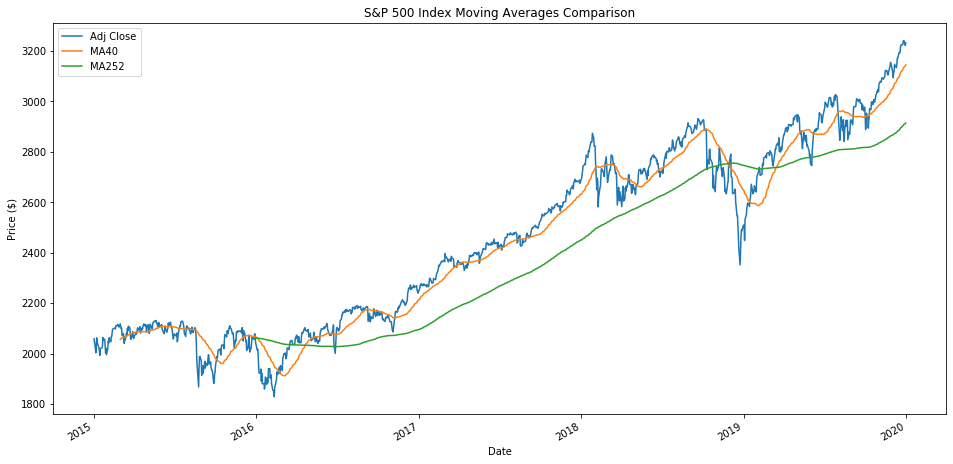

In [11]:
short_window = 40
long_window = 252
snp500_short_moving_avg = snp500_adj_close.rolling(short_window).mean()
snp500_long_moving_avg = snp500_adj_close.rolling(long_window).mean()

snp500_adj_close.plot(label='Adj Close', figsize=(16,8))
snp500_short_moving_avg.plot(label='MA'+str(short_window))
snp500_long_moving_avg.plot(label='MA'+str(long_window))
plt.title('S&P 500 Index Moving Averages Comparison')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

*For the market index, again the adjusted close price and moving averages move generally sideways up until 2017, although there are a lot more sharp rises and falls than the other 3 stocks. From 2017 on there is the same general uptrend in the market, with price generally above the moving averages, though at the end of 2018 there is a significant drop and rise in price and short average, whilst the long average holds steady reflecting long term outlook. There are 4 points of moving average crossover: the long moving average crosses above the short moving average on 05/01/16 which triggers a sell signal, then they crossover again on 21/04/16 telling the investor to buy the stock. Next they cross on 28/11/18 triggering a sell signal, and finally they cross once more on 15/03/19 triggering another buy signal for index.*

### Bollinger Bands

I'm able to run some further technical analysis on the price and moving average using Bollinger Bands. Bollinger Bands are a pair of trend lines plotted *m* standard deviations above and below a simple moving average of the stock's price. The bands are calculated as below:

$$ {\large Upper\,BB = BOLU = SMA_{p,n} + m\cdot\sigma(p_{moving}),} $$   
$$ {\large Lower\,BB = BOLD = SMA_{p,n} - m\cdot\sigma(p_{moving})} $$  
where:   
- $ \qquad SMA_{p,n}$ = Simple Moving Average of typical price p, over window of length n       
- $ \qquad m$ = Number of standard deviations away from SMA      
- $ \qquad \sigma(p_{moving})$ = Standard deviation of the moving price 

To plot the Bollinger Bands, I first isolate the high and low prices so that the typical price (mean of high, low and close) can be calculated - using variables `stock_high` and `stock_low`. I define the `window` and `no_of_std` variables to determine window size for the moving average, and the number of standard deviations above and below this for the upper and lower bands respectively. Then the bands are visualised for each individual stock, looking at just the year of 2019 so that more detail and points of interest can be seen clearly:

In [12]:
amzn_high = amzn_data['High']
aapl_high = aapl_data['High']
nflx_high = nflx_data['High']
snp500_high = snp500_data['High']

amzn_low = amzn_data['Low']
aapl_low = aapl_data['Low']
nflx_low = nflx_data['Low']
snp500_low = snp500_data['Low']

**Amazon**

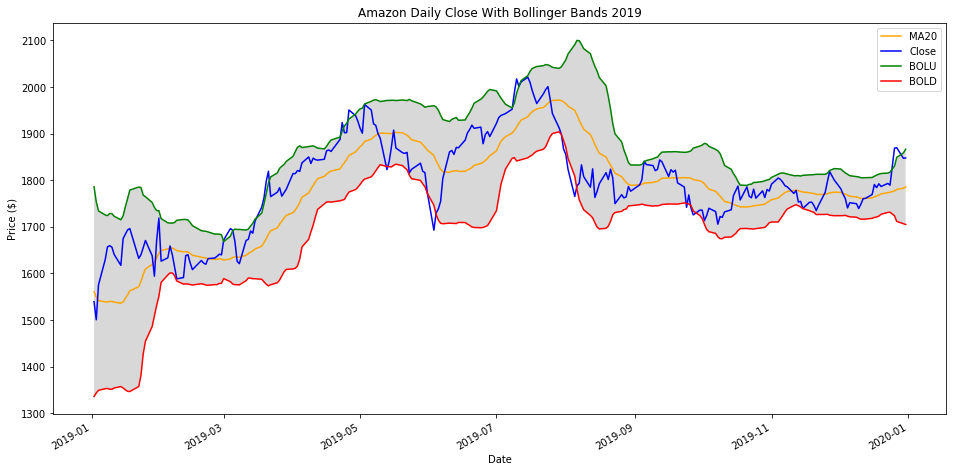

In [13]:
window = 20
no_of_std = 2
amzn_typical_price = ((amzn_high.loc['2018-12-01':'2019-12-31'] 
                      + amzn_low.loc['2018-12-01':'2019-12-31'] 
                      + amzn_close.loc['2018-12-01':'2019-12-31'])
                      / 3)
amzn_bollinger_moving_avg = amzn_typical_price.rolling(window).mean()
amzn_bollinger_moving_avg_std = amzn_typical_price.rolling(window).std()
amzn_upper_bollinger = amzn_bollinger_moving_avg + (no_of_std * amzn_bollinger_moving_avg_std)
amzn_lower_bollinger = amzn_bollinger_moving_avg - (no_of_std * amzn_bollinger_moving_avg_std)

amzn_bollinger_moving_avg.plot(label='MA'+str(window), color='orange', figsize=(16,8))
amzn_close.loc['2019-01-01':'2019-12-31'].plot(label='Close', color='blue')
amzn_upper_bollinger.plot(label='BOLU', color='green')
amzn_lower_bollinger.plot(label='BOLD', color='red')
plt.title('Amazon Daily Close With Bollinger Bands 2019')
plt.ylabel('Price ($)')
plt.fill_between(
        amzn_bollinger_moving_avg.index, amzn_lower_bollinger, amzn_upper_bollinger, facecolor='grey',
        alpha=0.3)
plt.legend()
plt.show()

*The close price moving closer to the upper band (BOLU) implies an overbought market, and moving closer to the lower band (BOLD) implies an oversold market. For Amazon we can see that price moves between the bands somewhat periodically during this 1-year period, although there is an extended time from March to May where the stock appears to be overbought, then as the price peaks and falls off, it moves below the moving average into oversold territory. The width of the bands tell us about the level of volatility, and it is relatively similar throughout, with it being particularly volatile in the first month - this can imply future narrowing and that it may be a time to exit.*

**Apple**

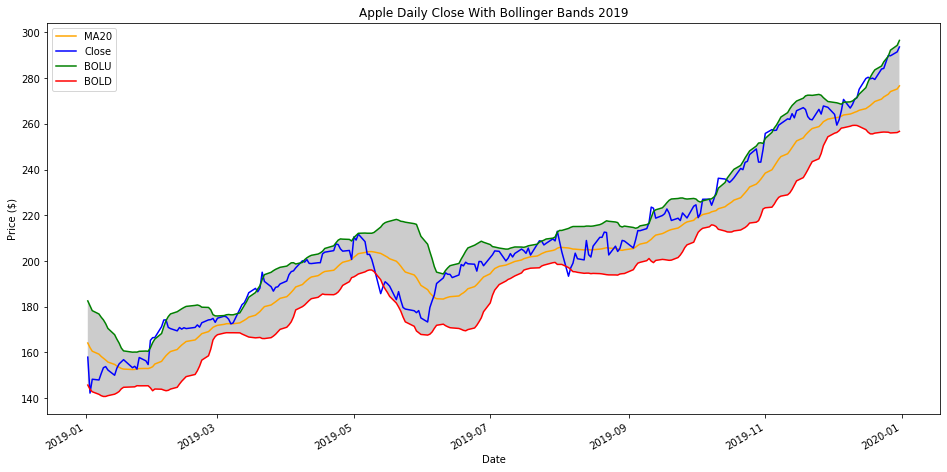

In [14]:
window = 20
no_of_std = 2
aapl_typical_price = ((aapl_high.loc['2018-12-01':'2019-12-31'] 
                      + aapl_low.loc['2018-12-01':'2019-12-31'] 
                      + aapl_close.loc['2018-12-01':'2019-12-31']) 
                      / 3)
aapl_bollinger_moving_avg = aapl_typical_price.rolling(window).mean()
aapl_bollinger_moving_avg_std = aapl_typical_price.rolling(window).std()
aapl_upper_bollinger = aapl_bollinger_moving_avg + (no_of_std * aapl_bollinger_moving_avg_std)
aapl_lower_bollinger = aapl_bollinger_moving_avg - (no_of_std * aapl_bollinger_moving_avg_std)

aapl_bollinger_moving_avg.plot(label='MA'+str(window), color='orange', figsize=(16,8))
aapl_close.loc['2019-01-01':'2019-12-31'].plot(label='Close', color='blue')
aapl_upper_bollinger.plot(label='BOLU', color='green')
aapl_lower_bollinger.plot(label='BOLD', color='red')
plt.title('Apple Daily Close With Bollinger Bands 2019')
plt.ylabel('Price ($)')
plt.fill_between(
        aapl_bollinger_moving_avg.index, aapl_lower_bollinger, aapl_upper_bollinger, facecolor='grey', 
        alpha=0.4)
plt.legend()
plt.show()

*Apple's close price is generally above the moving average throughout the period, implying that it is mostly an overbought stock during this year. The bands are narrow throughout, telling us that this a stock of generally low volatility; with a particular squeeze in early March, implying a possible increase in volatility and trading opportunities. There are a few breakouts, though they are very short lived and barely leave the bands.*

**Netflix**

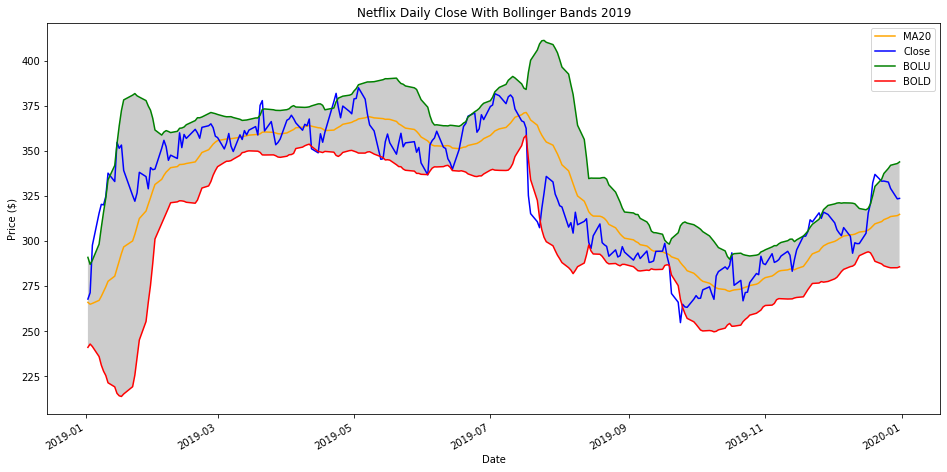

In [15]:
window = 20
no_of_std = 2
nflx_typical_price = ((nflx_high.loc['2018-12-01':'2019-12-31'] 
                      + nflx_low.loc['2018-12-01':'2019-12-31'] 
                      + nflx_close.loc['2018-12-01':'2019-12-31']) 
                      / 3)
nflx_bollinger_moving_avg = nflx_typical_price.rolling(window).mean()
nflx_bollinger_moving_avg_std = nflx_typical_price.rolling(window).std()
nflx_upper_bollinger = nflx_bollinger_moving_avg + (no_of_std * nflx_bollinger_moving_avg_std)
nflx_lower_bollinger = nflx_bollinger_moving_avg - (no_of_std * nflx_bollinger_moving_avg_std)

nflx_bollinger_moving_avg.plot(label='MA'+str(window), color='orange', figsize=(16,8))
nflx_close.loc['2019-01-01':'2019-12-31'].plot(label='Close', color='blue')
nflx_upper_bollinger.plot(label='BOLU', color='green')
nflx_lower_bollinger.plot(label='BOLD', color='red')
plt.title('Netflix Daily Close With Bollinger Bands 2019')
plt.ylabel('Price ($)')
plt.fill_between(
        nflx_bollinger_moving_avg.index, nflx_lower_bollinger, nflx_upper_bollinger, facecolor='grey', 
        alpha=0.4)
plt.legend()
plt.show()

*Netflix's price moves above and below its moving average quite frequently, with a long period of overbuying in the first few months of 2019, and an extended period of overselling from July to October. The bands are generally narrow, with particular volatility in the first month, followed by an extended period of relatively low volatility, and a tight squeeze in September. Again there a few, relatively minor breakouts from the bands. In July there is an interesting point where the price moves from the upper band to the lower band very quickly - implying a reversal in trend - which can be seen in the downtrend for the following 4 months.*

**S&P 500 Index**

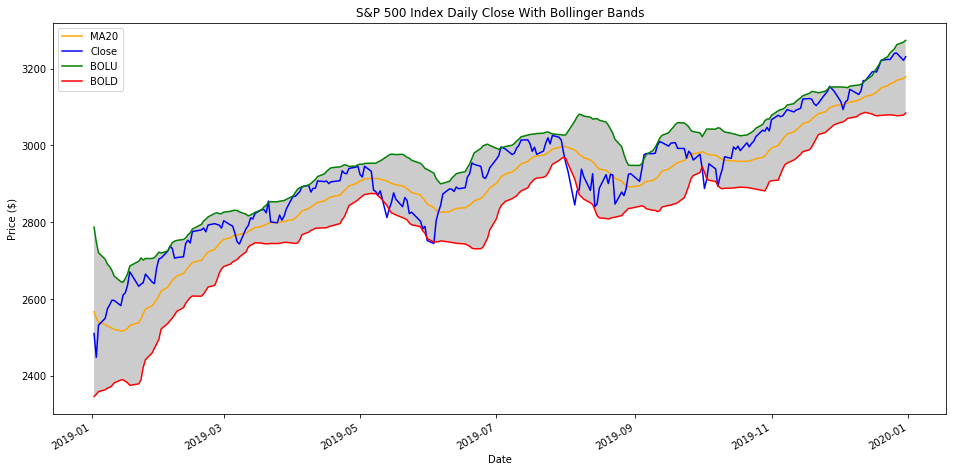

In [16]:
window = 20
no_of_std = 2
snp500_typical_price = ((snp500_high.loc['2018-12-01':'2019-12-31'] 
                        + snp500_low.loc['2018-12-01':'2019-12-31'] 
                        + snp500_close.loc['2018-12-01':'2019-12-31']) 
                        / 3)
snp500_bollinger_moving_avg = snp500_typical_price.rolling(window).mean()
snp500_bollinger_moving_avg_std = snp500_typical_price.rolling(window).std()
snp500_upper_bollinger = snp500_bollinger_moving_avg + (no_of_std * snp500_bollinger_moving_avg_std)
snp500_lower_bollinger = snp500_bollinger_moving_avg - (no_of_std * snp500_bollinger_moving_avg_std)

snp500_bollinger_moving_avg.plot(label='MA'+str(window), color='orange', figsize=(16,8))
snp500_close.loc['2019-01-01':'2019-12-31'].plot(label='Close', color='blue')
snp500_upper_bollinger.plot(label='BOLU', color='green')
snp500_lower_bollinger.plot(label='BOLD', color='red')
plt.title('S&P 500 Index Daily Close With Bollinger Bands')
plt.ylabel('Price ($)')
plt.fill_between(
        snp500_bollinger_moving_avg.index, snp500_lower_bollinger, snp500_upper_bollinger, facecolor='grey', 
        alpha=0.4)
plt.legend()
plt.show()

*The close price for the market index generally stays above the moving average, displaying the overbought nature of the stock, as well as the strong uptrend in price that we can see during this period. The bands are narrow throughout, as to be expected with the (diverse) market index, although there is a short period of high relative volatility in the first month of our date range. There are a few instances where the price moves from one band to the other, indicating short term trend reversals, and there are very few breakouts from the bands, with any instance being a short and minor breakout.*

### Candlestick Charts

Finally in my price analysis I create a candlestick chart for each stock, which visualises OHLC (Open, High, Low, Close), with a red candle representing a net drop in daily price, and a green one representing a net rise in daily price. The wide parts of the candle, known as the 'real body', represent the range between open and close prices for the day, and the lines above and below, known as the upper and lower 'shadow', represent the high and low prices for the day.

This requires the `candlestick_ohlc` import of the `mplfinance` module in order to plot the charts. For each one, I isolate the desired date range using the `loc` function, map the dates to matplotlib dates using `lambda` and `date2num`, and reformat the dates into weekly format - starting with Monday for each week on the graph. Then I create a list of tuples containing all the relevant data for each day, which has been formatted as required using the `list_of_cols` list. This is all plotted, for each individual stock, using the `candlestick_ohlc` function - only over the final quarter of 2018 for clarity and the ability to spot trends and patterns:

**Amazon**

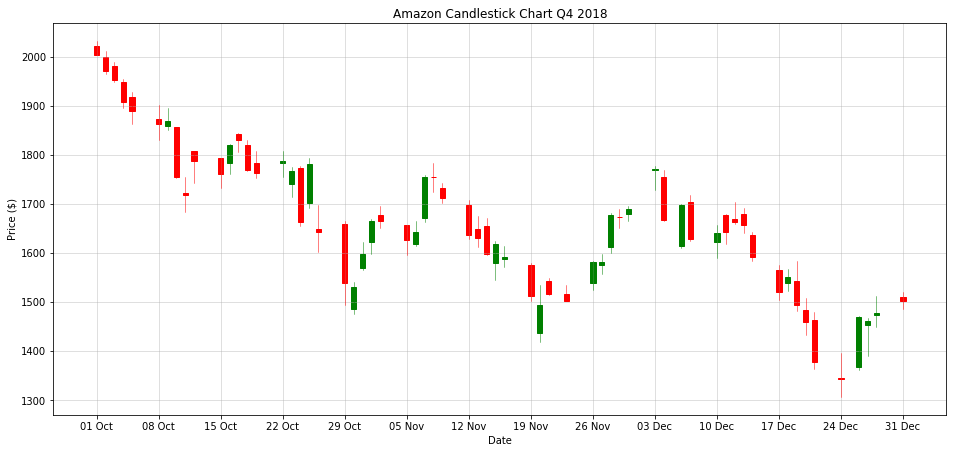

In [70]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DateLocator, MONDAY
import warnings
warnings.simplefilter('ignore')

amzn_reset = amzn_data.loc['2018-10-01':'2018-12-31'].reset_index()
amzn_reset['date_ax'] = amzn_reset['Date'].apply(lambda date: date2num(date))

list_of_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
amzn_values = [tuple(vals) for vals in amzn_reset[list_of_cols].values]

mondays = WeekdayLocator(MONDAY)
alldays = DateLocator()
weekFormatter = DateFormatter('%d %b')
dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots(figsize=(16,8))
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(weekFormatter)
ax.set_title('Amazon Candlestick Chart Q4 2018', size = 12)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.5)

candlestick_ohlc(ax, amzn_values, width=0.6, colorup='g', colordown='r');

*Amazon's candlestick chart shows the general downward trend over this 3-month period, although there are interesting points and patterns to be observed. There is a piercing line pattern from 5th-6th Nov, a sign that a bullish trend could emerge, which it does though only for a couple of days. We also have dojis at 8th Nov and 29th Nov, characterising a day where there was price movement but the open and close prices are very similar, and that there was possibly a struggle between sellers and buyers. There is a hanging man on 3rd Dec - this is an indicator which appears in an uptrend and generally signifies that this is about to end, which it does as can be seen over the next 3 weeks. Finally, from 17th-18th Dec there is a bullish harami pattern, which can signify that a downtrend is reversing into an uptrend, although there are a few trading days before this actually becomes the case.*

**Apple**

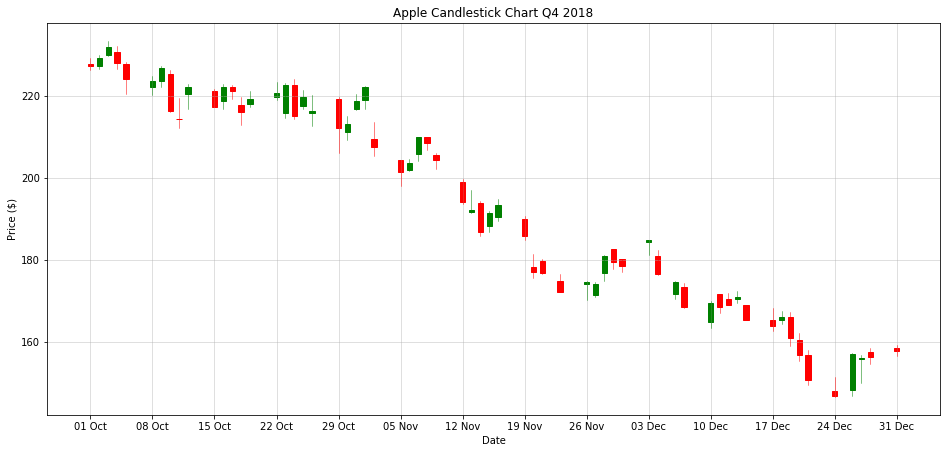

In [18]:
aapl_reset = aapl_data.loc['2018-10-01':'2018-12-31'].reset_index()
aapl_reset['date_ax'] = aapl_reset['Date'].apply(lambda date: date2num(date))

list_of_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
aapl_values = [tuple(vals) for vals in aapl_reset[list_of_cols].values]

mondays = WeekdayLocator(MONDAY)
alldays = DateLocator()
weekFormatter = DateFormatter('%d %b')
dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots(figsize=(16,8))
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(weekFormatter)
ax.set_title('Apple Candlestick Chart Q4 2018', size = 12)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.5)

candlestick_ohlc(ax, aapl_values, width=0.6, colorup='g', colordown='r');

*Apple's chart shows a clear and sustained downward trend over the 3-month period, with regular but minor rises and falls. From 14th-15th Nov we have a bullish harami pattern, which signals that a downtrend is reversing into an uptrend - although in this instance it is very short lived. Between 10th-12th Dec we see a dark cloud cover pattern, which, as it appears locally in an uptrend, signals that a downward trend may emerge - which can be seen for the next 2 weeks. From 18th-19th Dec there is a bearish engulfing pattern, whereby the small bullish candlestick is engulfed by the larger bearish candlestick, signifying a bearish trend is on the brink of emerging. Finally, we see a hammer on 27th Dec, signifying that a bullish trend could begin from that point.*

**Netflix**

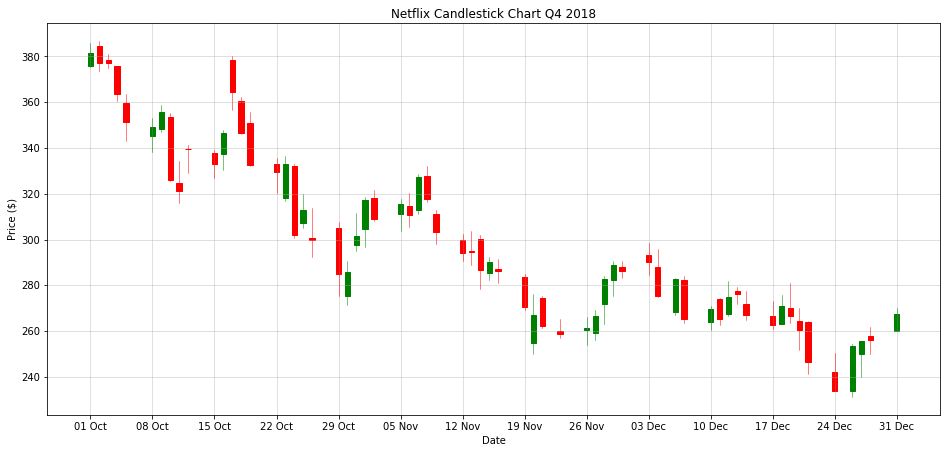

In [19]:
nflx_reset = nflx_data.loc['2018-10-01':'2018-12-31'].reset_index()
nflx_reset['date_ax'] = nflx_reset['Date'].apply(lambda date: date2num(date))

list_of_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
nflx_values = [tuple(vals) for vals in nflx_reset[list_of_cols].values]

mondays = WeekdayLocator(MONDAY)
alldays = DateLocator()
weekFormatter = DateFormatter('%d %b')
dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots(figsize=(16,8))
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(weekFormatter)
ax.set_title('Netflix Candlestick Chart Q4 2018', size = 12)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.5)

candlestick_ohlc(ax, nflx_values, width=0.6, colorup='g', colordown='r');

*Netflix, similar to Amazon, shows a general downward trend in price, with a few rises and falls over time. It also has a number of long candles - suggesting a relatively high level of price activity, or volatility, on a number of days. Between 1st-2nd Oct we see a bearish engulfing pattern, signifying the bearish trend that emerges afterwards. From 17th-19th Oct we have the three black crows pattern, which, coming off a (brief) uptrend, signals that a bearish market will emerge once again. Conversely, from 27th-29th Nov, we have the three white soldiers pattern, which is a significant sign that the preceding downtrend has ended - this can be seen by the general sideways movement for the next few weeks. On 19th Dec there is a shooting star - a signal that the price will begin to fall, as it does for the 3 days after we see it. Finally, we see a bullish engulfing pattern from 24th-26th Dec, indicating that a bullish trend may emerge, which we can see the possible beginning of in the final few days of our observed period.*

**S&P 500 Index**

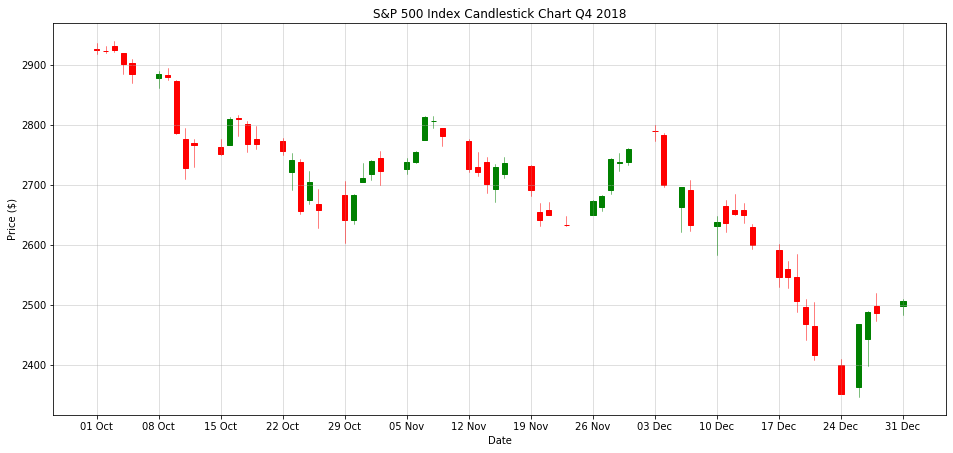

In [20]:
snp500_reset = snp500_data.loc['2018-10-01':'2018-12-31'].reset_index()
snp500_reset['date_ax'] = snp500_reset['Date'].apply(lambda date: date2num(date))

list_of_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
snp500_values = [tuple(vals) for vals in snp500_reset[list_of_cols].values]

mondays = WeekdayLocator(MONDAY)
alldays = DateLocator()
weekFormatter = DateFormatter('%d %b')
dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots(figsize=(16,8))
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(weekFormatter)
ax.set_title('S&P 500 Index Candlestick Chart Q4 2018', size = 12)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.5)

candlestick_ohlc(ax, snp500_values, width=0.6, colorup='g', colordown='r');

*The market index also has a general downtrend through the period observed, particularly in the final month of the three, and also has a number of very small candles - indicating a number of days with very little price activity or volatility. On 10th Oct there is a hanging man, which signifies that the (short) uptrend is about to end. There are two instances of a bullish harami close together - from the 24th-25th and 29th-30th Oct - both signalling that the current downtrend is reversing into the uptrend which follows. Between 7th-9th Nov there is an evening star pattern, which implies that a bearish trend could form - a further sign of which is the three black crows from 9th-13th Nov. There's a hammer on 10th Dec which signifies that the bearish trend may come to an end, however this is short-lived as the trend re-emerges a few days later - signalled by the shooting star on 12th Dec, and then the two black gapping from 13th-14th Dec.*

-------

## Stock Returns Analysis

### Simple Daily Returns Histograms

Firstly, I calculate the simple daily returns for each stock, which are calculated using the below formula:

$$ {\large Simple\,Returns = \frac{p_{1}-p_{0}}{p_{0}} = \frac{p_{1}}{p_{0}}-1} $$ 
where:     
- $ \qquad p_{0}$ = Initial stock price      
- $ \qquad p_{1}$ = Stock price at end of the period

The returns are calculated using the `pct_change()` function from `Pandas`, then a histogram is plotted for each stock using `hist()`, which shows the frequency of different levels of daily returns for each stock. The histograms are plotted on the same $x$ and $y$ axes by setting the `sharex` and `sharey` arguments as `True`, in order to give a direct visual comparison:

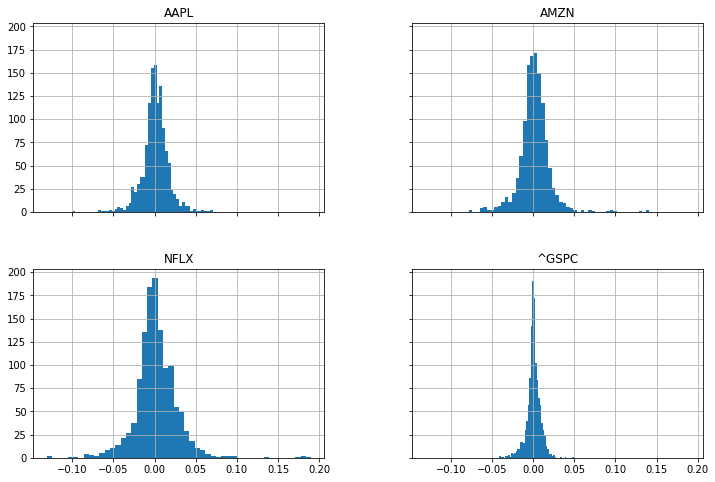

In [21]:
daily_returns = stock_adj_close_price.pct_change()

daily_returns.hist(bins=50, sharex=True, sharey=True, figsize=(12,8))
plt.show()

*In comparing the histograms of daily stock returns, we can see that all have similar shapes - somewhat symmetric about x=0, although there are slight differences between them. Of the 3 stocks, Apple is the most symmetric, with Amazon and Netflix being slightly positively skewed, due to the few data points that are far to the right of the peak. Netflix is particularly interesting, as it has the highest peak, with nearly 200 occurrences of approximately 0 returns, while it also has the largest horizontal spread of data - implying it potentially has a higher level of price volatility. Conversely, the market index has the most horizontally-tight spread of data, with it all lying between -5% and 5% returns - implying it has relatively lower price volatility, which is to be expected given its inherent level of diversification. Overall, it would be difficult to pick any of the 3 stocks over each other looking at these histograms, due to the rough visual similarity - thus more data would be needed when identifying which stock to invest in.*

### Stacked Histogram Of Simple Daily Returns

Another way to directly compare the daily returns frequency is to create a stacked histogram, where all of the histograms are overlaid on top of one another, as below (for visual clarity, the market index is not shown). Firstly the daily returns of each individual stock are isolated in variables, `stock_daily_returns`, then the results are plotted on a single set of axes, changing the `alpha` so that they can all be seen when overlapping:

In [22]:
amzn_daily_returns = daily_returns['AMZN']
aapl_daily_returns = daily_returns['AAPL']
nflx_daily_returns = daily_returns['NFLX']
snp500_daily_returns = daily_returns['^GSPC']

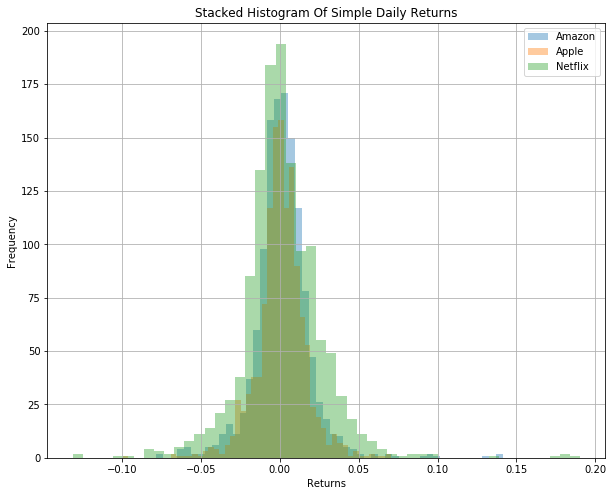

In [23]:
amzn_daily_returns.hist(label='Amazon', bins=50, alpha=0.4, figsize=(10,8))
aapl_daily_returns.hist(label='Apple', bins=50, alpha=0.4)
nflx_daily_returns.hist(label='Netflix', bins=50, alpha=0.4)
plt.title('Stacked Histogram Of Simple Daily Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

*This is an interesting way to compare the previous histograms as it can show subtle differences in shape and distribution, given the overlapped nature of the graphs. We can see clearly that Netflix has the highest peak, followed by Amazon and then Apple - although their peaks are at roughly the same level of returns, telling us that, given their relative symmetry, they all have similar mean returns. Again, it is clear that Netflix has the widest range of returns, followed by Amazon then Apple, showing that it likely has the higher volatility of returns, as well as more outliers from its interquartile range.* 

### Stacked KDE Plot Of Simple Daily Returns

A third way to represent these results, is to overlay their Kernel Density Estimation (KDE) plots, which I do by plotting the returns and setting the `kind` argument to `'kde'`. The KDE is a way to (non-parametrically) estimate the Probability Density Function (PDF) of a random variable:

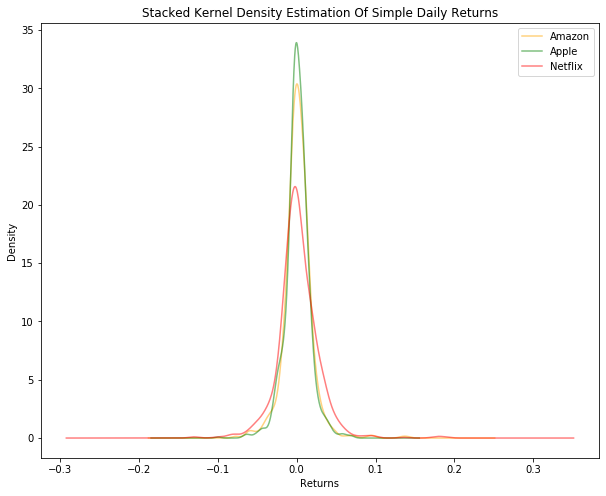

In [24]:
amzn_daily_returns.plot(kind='kde', label='Amazon', color='orange', alpha=0.5, figsize=(10,8))
aapl_daily_returns.plot(kind='kde', label='Apple', color='green', alpha=0.5)
nflx_daily_returns.plot(kind='kde', label='Netflix', color='red', alpha=0.5)
plt.title('Stacked Kernel Density Estimation Of Simple Daily Returns')
plt.xlabel('Returns')
plt.legend()
plt.show()

*The Kernel Density Estimation is a similar alternative to the histogram, in a way like a continuous replacement for the discrete histogram model. The KDE estimates the probability density function (pdf) of a random variable, so the area under each graph is 1 (the probability of a data point falling within the range of data). Interestingly, while the Netflix histogram exhibited the highest peak and Apple the lowest, in our KDE the Apple plot has the highest peak with Netflix having the lowest. What this portrays is the wider spread of Netflix's data - Apple's data is tighter and with few outliers, so its density around the 0.0 returns range is higher. Whereas, although Netflix has a higher frequency of returns around 0.0, because it has a number of outliers and generally wider spread of data, its density at the 0.0 range is lower and it has a shorter wider shape. Amazon, with its similar shape to Apple but a few more outliers, sits in between in terms of peak density and width at the lower density levels of its plot.*

### Box Plot Of Simple Daily Returns

A box plot is another effective way to compare daily returns for each stock, as it visualises some key statistical information for clear and direct comparison. The red line in the box represents the median of the data set (the middle value of the ordered data), the box shows the interquartile range (IQR), with the bottom being the first quartile (Q1), and the top being the third quartile (Q3). The whiskers extend up to the "maximum" (Q3 + (1.5IQR)), and extend down to the "minimum" (Q3 - (1.5IQR)), then the circular values beyond the whiskers are the "outliers".

I use `concat()` to concatenate the returns into 1 axis, set the `columns`, and then plot by changing the `kind` argument to `'box'`:

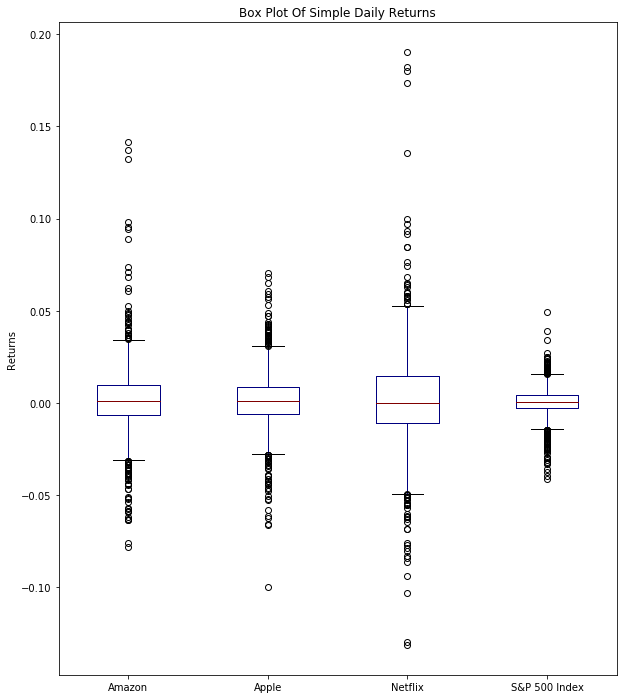

In [25]:
box_df = pd.concat([amzn_daily_returns, aapl_daily_returns, nflx_daily_returns, snp500_daily_returns], axis=1)
box_df.columns = ['Amazon', 'Apple', 'Netflix', 'S&P 500 Index']
box_df.plot(kind='box', colormap='jet', figsize=(10,12))
plt.title('Box Plot Of Simple Daily Returns')
plt.ylabel('Returns')
plt.show()

*The box plot gives us some similar insights to the histograms and KDE plots, although it gives a lot more detailed statistical insight into how all of the stocks compare. As we can gather from the symmetry of the histograms, the median of each stock's daily returns is very similar and hovers around the 0% level. However, the box plot gives us a clearer image of the spread of the data. Of the 3 stocks, we see that Netflix has the largest interquartile range, telling us that it has the widest spread of its 'middle half' of data, hence more varied price activity within that range. Meanwhile, the market index has a much narrower interquartile range than all of the 3 stocks, as we expect given it averages over the whole market. Each stock has a number of outliers, and while it is difficult to tell from this graph how many each stock has, we can clearly see that Netflix has a wider spread of outliers, with Apple the narrowest spread - attesting to the lower volatility of returns for Apple. Netflix also has both the greatest positive as well as the greatest negative daily return, telling us that it's returns can heavily swing either way, rather than just one in particular. Hence looking at this graph in a vacuum, we might take away that, of the 3 stocks, Apple is the least risky in terms of returns, but as such there is a greater potential for higher (positive and negative) return on investment with Netflix.*

### Simple Daily Returns Statistics

The `describe()` function allows me to see the numbers behind the data, and in particular the box plot visualisation above, as it gives the median and quartile values, as well as the mean, standard deviation and maximum daily returns values:

**Amazon**

In [26]:
amzn_daily_returns.describe()

count    1257.000000
mean        0.001593
std         0.018426
min        -0.078197
25%        -0.006551
50%         0.001305
75%         0.009935
max         0.141311
Name: AMZN, dtype: float64

*We see the exact data for our stocks, in particular that Amazon has a maximum return of +14.1% in a day during our 5-year period, with a minimum of -7.8%. The mean daily return is +0.16%, hence we know there is a net positive return on investment over the period, and these daily returns have a volatility of 1.8%.*

**Apple**

In [27]:
aapl_daily_returns.describe()

count    1257.000000
mean        0.000976
std         0.015646
min        -0.099607
25%        -0.005857
50%         0.000893
75%         0.008918
max         0.070421
Name: AAPL, dtype: float64

*Apple's maximum daily return is only +7.0%, less than half the maximum of Amazon, and has a minimum of -9.9%, which is a greater loss than the highest loss on Amazon stock. The mean daily return is +0.10%, with a volatility of 1.6%. All of this tells us that Apple has a lower average return than Amazon, but also a lower volatility of returns - so it is less risk but also less reward.*

**Netflix**

In [28]:
nflx_daily_returns.describe()

count    1257.000000
mean        0.001829
std         0.026253
min        -0.131262
25%        -0.010836
50%         0.000291
75%         0.014801
max         0.190281
Name: NFLX, dtype: float64

*Netflix has the highest maximum daily return, +19.0%, but then also has the most severe minimum, -13.1%. It also has the highest mean daily return, +0.18%, and greatest volatility at 2.6%. This shows us that Netflix has the highest overall reward, but also the highest level of risk on investment, as we would expect given the returns seen.*

**S&P 500 Index**

In [29]:
snp500_daily_returns.describe()

count    1257.000000
mean        0.000395
std         0.008466
min        -0.040979
25%        -0.002944
50%         0.000493
75%         0.004636
max         0.049594
Name: ^GSPC, dtype: float64

*As expected due to its inherent diversification - the market index has the lowest maximum (+5.0%), the least minimum (-4.1%), and the lowest volatility (0.8%). However, it also has the lowest mean returns (+0.04%) - telling us that all of the 3 stocks analysed outperformed the overall market during this 5-year time period, as well as that the market has increased as a whole over this time.*

### Scatter Matrix Of Simple Daily Returns 

The scatter matrix below shows the pair-wise correlation of simple daily returns between the stocks, using the kernel density estimates of each stock - as shown by setting the `diagonal` argument to `'kde'`:

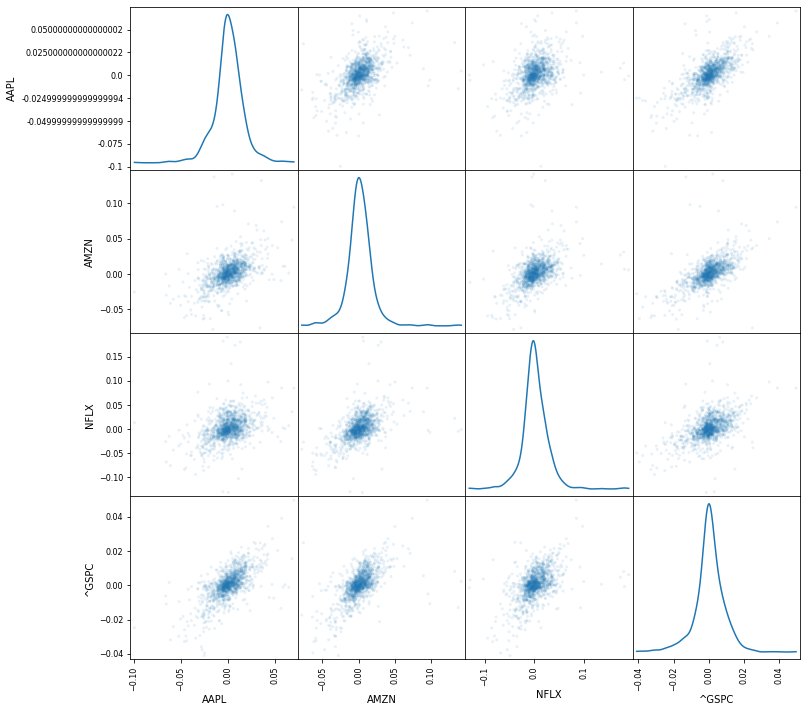

In [30]:
pd.plotting.scatter_matrix(daily_returns, diagonal='kde', alpha=0.1, figsize=(12,12))
plt.show()

*We can visually see that the all of the plots are somewhat similar at a glance, and so there are similar levels of correlation between each pair of stocks. Apple and the market index seem to have the strongest positive linear correlation, with few outliers, telling us that Apple's performance was most similar to the overall market of the 3 stocks analysed. Conversely, the plots between Apple and Netflix seem to have the least shape to them - there is a slight positive association, though it has the least linearity of all of the plots above. This backs up the statistics as we know that Apple has the lowest mean returns and volatility, while Netflix has the highest of each.*

### Daily Log Returns

I can also calculate the daily log returns, which can be a very useful alternative to raw returns for a number of reasons. For example, time additivity - if considering a sequence of $n$ trades and wanting to calculate compound returns, we take the difference in log between the final and initial periods (as the sum of normally distributed variables is normal). In terms of algorithmic complexity, this reduces $O(n)$ multiplications (if we calculated compound simple returns) to just $O(1)$ additions (in calculating compound log returns). Below is how log returns are calculated:

$$ {\large Log\,Returns = \ln{\bigg(\frac{p_{1}}{p_{0}}\bigg)} = \ln{\big(\Delta_{p_{0},p_{1}}+1\big)}} $$ 
where:     
- $ \qquad p_{0}$ = Initial stock price     
- $ \qquad p_{1}$ = Stock price at end of the period       
- $ \qquad \Delta_{p_{0},p_{1}}$ = % change in stock price

The log returns are calculated in Python using the `log()` function from the `NumPy` module:

In [31]:
import numpy as np

amzn_daily_log_returns = np.log(amzn_daily_returns + 1)
aapl_daily_log_returns = np.log(aapl_daily_returns + 1)
nflx_daily_log_returns = np.log(nflx_daily_returns + 1)
snp500_daily_log_returns = np.log(snp500_daily_returns + 1)

### Simple Quarterly Returns

Now I use `resample('3M').mean()` to resample the data for each stock, so that it gives an average figure for each 3 month period (quarter). Then I isolate the returns for each stock, and plot quarterly returns for the 3 stocks (omitting the market index for visual clarity), with a dashed line at $y=0$, so that positive returns are above the line and negative returns below:

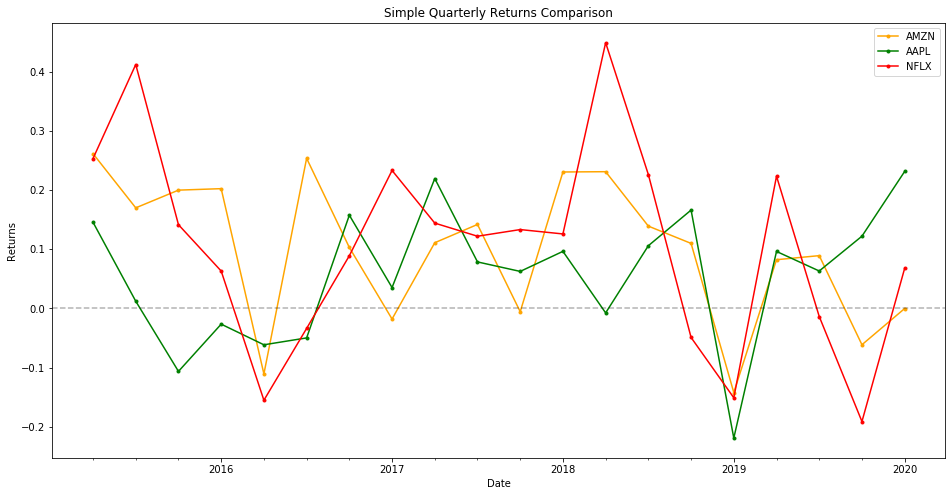

In [32]:
amzn_quarterly_data = amzn_data.resample('3M').mean()
aapl_quarterly_data = aapl_data.resample('3M').mean()
nflx_quarterly_data = nflx_data.resample('3M').mean()
snp500_quarterly_data = snp500_data.resample('3M').mean()

amzn_quarterly_returns = amzn_quarterly_data['Adj Close'].pct_change()
aapl_quarterly_returns = aapl_quarterly_data['Adj Close'].pct_change()
nflx_quarterly_returns = nflx_quarterly_data['Adj Close'].pct_change()
snp500_quarterly_returns = snp500_quarterly_data['Adj Close'].pct_change()

amzn_quarterly_returns.plot(label='AMZN', color='orange', marker='.', figsize=(16,8))
aapl_quarterly_returns.plot(label='AAPL', color='green', marker='.')
nflx_quarterly_returns.plot(label='NFLX', color='red', marker='.')
plt.axhline(y=0, linestyle='--', color='black', alpha=0.3)
plt.title('Simple Quarterly Returns Comparison')
plt.ylabel('Returns')
plt.legend()
plt.show()

*Given the line at 0% returns, we can clearly see that, while each stock has quarters of negative returns, overall each stock has more quarters of positive returns and clearly has a net positive return over the 5-year period. Over the 20 quarters, Amazon has the highest return in the most number of quarters (8), whilst Apple has the lowest return in the most number of quarters (10). Netflix has the highest maximum quarterly return, at +44.9% in Q1 2018, meanwhile Apple has the lowest minimum quarterly return, at -21.9% in Q4 2018, and Netflix also has the highest range between its maximum and minimum, of 64.0%. Interestingly, both Amazon and Apple have their minimum return in Q4 2018, and with this quarter having the lowest average return over the 3 stocks, it was clearly a turbulent quarter in the market. The average quarterly returns are +10.4% for Netflix, +9.9% for Amazon, and +5.6% for Apple - this is no surprise as they must be in the same order of returns as for the daily returns, given that the mean is taken over the same period. Finally, Netflix has the highest volatility of quarterly returns at 17.2%, whilst Apple has the lowest at 11.2%, as we can tell visually from the tighter vertical range of Apple's graph compared to that of Netflix.*

### Simple Annual Returns

The same thing is now done to show annual returns of the stocks, this time using `resample('12M').mean()` to give annual data, then isolating annual returns and plotting:

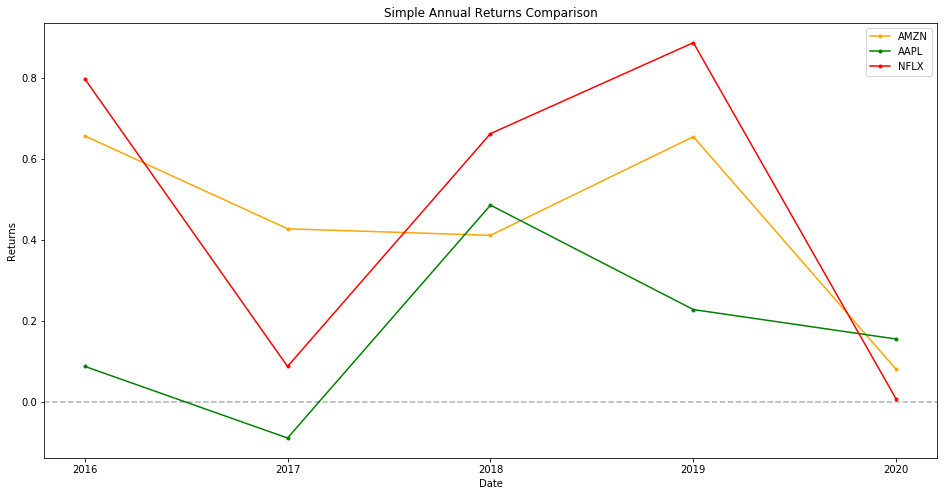

In [33]:
amzn_annual_data = amzn_data.resample('12M').mean()
aapl_annual_data = aapl_data.resample('12M').mean()
nflx_annual_data = nflx_data.resample('12M').mean()
snp500_annual_data = snp500_data.resample('12M').mean()

amzn_annual_returns = amzn_annual_data['Adj Close'].pct_change()
aapl_annual_returns = aapl_annual_data['Adj Close'].pct_change()
nflx_annual_returns = nflx_annual_data['Adj Close'].pct_change()
snp500_annual_returns = snp500_annual_data['Adj Close'].pct_change()

amzn_annual_returns.plot(label='AMZN', color='orange', marker='.', figsize=(16,8))
aapl_annual_returns.plot(label='AAPL', color='green', marker='.')
nflx_annual_returns.plot(label='NFLX', color='red', marker='.')
plt.axhline(y=0, linestyle='--', color='black', alpha=0.3)
plt.title('Simple Annual Returns Comparison')
plt.ylabel('Returns')
plt.legend()
plt.show()

*This annual returns graph gives a fascinating comparison with the quarterly returns graph, as it gives a clearer image of the overall picture and performance of the stocks, given less regular swings above and below the negative - there is only one stock which has a year of negative returns, and that is only for one year. Over the 5 years, Netflix has the highest returns in the most number of years (3), whilst Apple has the lowest return in the most number of years (3). Netflix has the highest maximum return in a year, with a huge +88.6% over 2018, whilst Apple has the lowest minimum return in a year with -8.9% over 2016, and again Netflix has the largest range between its minimum and maximum return in a year, of +88.0%. Apple has its lowest returns in its first 2 years, then improves relative to the others and has the highest return of the 3 stocks in the final year (2019) - this is somewhat due to both Amazon and Netflix having their minimum annual return in this same period. The average annual returns are +48.8% for Netflix, +44.6% for Amazon, and the relatively small +17.3% for Apple - again being in the expected order. Finally, Netflix once again has the highest volatility of annual returns at 10.4%, whilst Apple's sits at the lowest at 5.6% - this difference is not as clear visually in this graph as it was for the quarterly results.*

### Cumulative Daily Returns

Now I calculate cumulative daily returns of the stocks over the 5-year period. This shows us the aggregate amount the stock has gained (or lost) over time, and is calculated as below:

$$ {\large Cumulative\,Returns=\prod_{i=1}^{n}(1+r_{i})}$$ 
where:      
- $ \qquad r_{i}$ = Stock returns over period i     
- $ \qquad n$ = Number of time periods 

This is calculated in Python using the `cumprod()` function from `Pandas` to calculate the cumulative product of the returns for each stock, and as plotted below you can see how you're initial investment would have performed if held for the 5-year period, in terms of how many times its value would have multiplied:

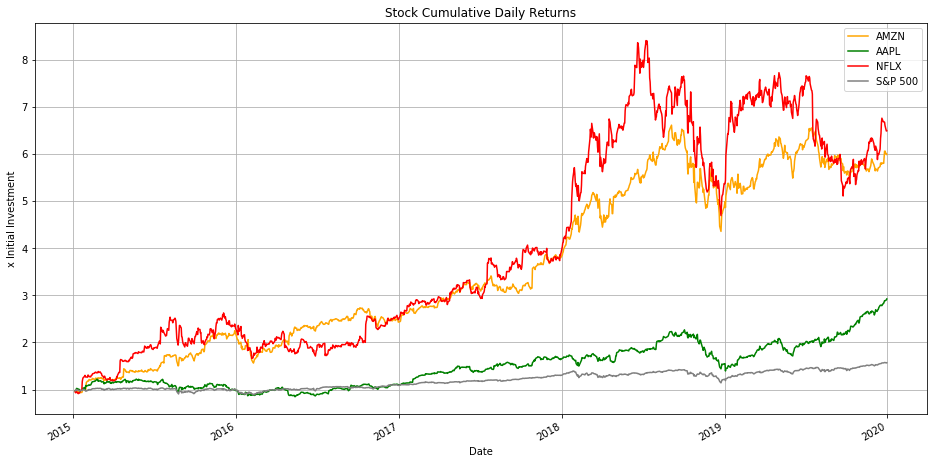

In [34]:
amzn_cum_daily_returns = (1 + amzn_daily_returns).cumprod()
aapl_cum_daily_returns = (1 + aapl_daily_returns).cumprod()
nflx_cum_daily_returns = (1 + nflx_daily_returns).cumprod()
snp500_cum_daily_returns = (1 + snp500_daily_returns).cumprod()

amzn_cum_daily_returns.plot(label='AMZN', color='orange', figsize=(16,8))
aapl_cum_daily_returns.plot(label='AAPL', color='green')
nflx_cum_daily_returns.plot(label='NFLX', color='red')
snp500_cum_daily_returns.plot(label='S&P 500', color='grey')
plt.title('Stock Cumulative Daily Returns')
plt.ylabel('x Initial Investment')
plt.legend()
plt.grid(True)
plt.show()

*Clearly over the 5 years Amazon and Netflix well out-performed Apple in terms of cumulative returns, although all 3 stocks comfortably out-performed the market as a whole in this time. Netflix ended up as the highest growing stock at the end of our period: having bought their stock on 1/1/15, you would have multiplied your initial investment 6.5x by 31/12/19 - however, had you sold at its peak on 9/7/18, you would have multiplied your initial investment by 8.4x. Amazon was the 2nd-highest growing stock in terms of returns, often dipping above and below the returns of Netflix; multiplying initial investment over the period 6.0x, and at its peak on 4/9/18 you could have returned 6.6x your initial investment. Finally, Apple saw the lowest overall returns of the 3, multiplying initial investment 2.9x over the 5 years - this end of the period also being its peak in cumulative returns, and interestingly had you sold at points in 2015 and 2016 you would have made a loss on your investment. Despite this wide range of returns, each stock was better off than the market as a whole - had you invested in the market index you would have only multiplied your initial investment 1.6x after 5 years, again being the peak of its cumulative returns. So, despite Apple having substantially lower returns than Amazon and Netflix, it was still a very good investment to hold on to over this time period, as well as being a lot more stable as can be seen by the minimal levels of deviation in its graph relative to the other 2 stocks. It is also important to remember that this graph doesn't show absolute returns, rather just how many times you could multiply an initial investment - given that Amazon's stock price was many times greater than that of Apple and Netflix throughout the period, the absolute returns on Amazon stock were much higher on a return per-stock basis.*

### Compound Annual Growth Rate

Compound Annual Growth Rate (CAGR) shows the average annual rate of growth required for a stock to go from its initial value to its final value over a period of time - it is the annual rate of return required that, when compounded, gives the cumulative return over a given time period. CAGR is calculated as below:

$$ {\large CAGR=\left(\frac{V_{t_{n}}}{V_{t_{0}}}\right)^{1/n} - 1} $$ 
where:     
- $ \qquad V_{t_{0}}$ = Initial stock value (at time $t_{0}$)      
- $ \qquad V_{t_{n}}$ = Final stock value (at time $t_{n}$)       
- $ \qquad n$ = Number of time periods

I calculate the number of days of data for each stock using `index`, then annualise it by dividing by 365 to give the value of $n$, and calculate CAGR for each stock:

In [35]:
amzn_days = (amzn_data.index[-1] - amzn_data.index[0]).days
amzn_initial = amzn_adj_close[1]
amzn_final = amzn_adj_close[-1]
n = amzn_days / 365.0

amzn_cagr = ((amzn_final / amzn_initial) ** (1 / n))  - 1
amzn_cagr

0.43669003378317006

In [36]:
aapl_days = (aapl_data.index[-1] - aapl_data.index[0]).days
aapl_initial = aapl_adj_close[1]
aapl_final = aapl_adj_close[-1]
n = aapl_days / 365.0

aapl_cagr = ((aapl_final / aapl_initial) ** (1 / n))  - 1
aapl_cagr

0.24654176746201206

In [37]:
nflx_days = (nflx_data.index[-1] - nflx_data.index[0]).days
nflx_initial = nflx_adj_close[1]
nflx_final = nflx_adj_close[-1]
n = nflx_days / 365.0

nflx_cagr = ((nflx_final / nflx_initial) ** (1 / n))  - 1
nflx_cagr

0.4692374765364933

In [38]:
snp500_days = (snp500_data.index[-1] - snp500_data.index[0]).days
snp500_initial = snp500_adj_close[1]
snp500_final = snp500_adj_close[-1]
n = snp500_days / 365.0

snp500_cagr = ((snp500_final / snp500_initial) ** (1 / n))  - 1
snp500_cagr

0.09847106037761488

*As mentioned, the CAGR gives us the annual rate of return required for the returns seen over our time period. So on the basis that the average annual returns of the market were +9.85%, clearly all of our stocks performed very well on average. So on average, annually, Apple outperformed the market 2.5x, while Amazon outperformed it 4.4x, and Netflix 4.8x.*

-----

## Stock Volatility Analysis

### Moving Historical Volatility

The moving historical volatility of the stocks gives a statistical measure of the dispersion of returns over time, by looking at the deviation of the moving returns from the average moving return over time. The standard deviation is normalised so the historical volatility reflects the time period of the window over which it is taken, hence the $\sqrt{t_{min}}$ in its formula below:

$$ {\large Moving\,Historical\,Volatility=\sigma \large( r_{moving} \large) \cdot \sqrt{t_{min}}} $$
where:       
- $ \qquad \sigma(r_{moving})$ = Standard deviation of the moving returns       
- $ \qquad t_{min}$ = Minimum number of periods, or size of the rolling window

I set the moving window length in the `min_periods` variable, then `rolling(min_periods).std()` to take the standard deviation of the moving average returns, and use `sqrt()` from `NumPy` to normalise the volatility and plot the results:

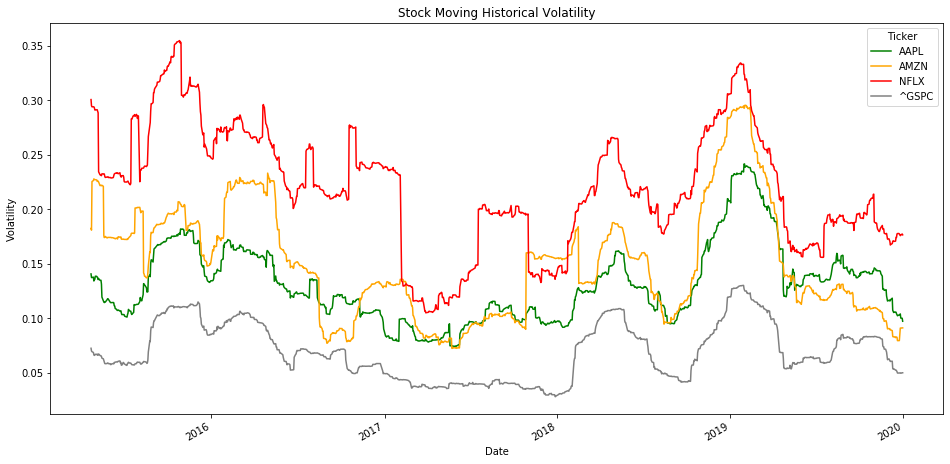

In [39]:
min_periods = 75
volatility = daily_returns.rolling(min_periods).std() * np.sqrt(min_periods)

volatility.plot(color=['green', 'orange', 'red', 'grey'], figsize=(16,8))
plt.title('Stock Moving Historical Volatility')
plt.ylabel('Volatility')
plt.show()

*Given our moving window of 75 days, our volatility at any point on the graph shows the level over the preceding 75 trading days. We can see clearly the effects of diversification straight away in this graph, given that the level of volatility of the overall market does not exceed that of any of the stocks at any time. We also see that Netflix is the most volatile for the vast majority of the time, with just a couple of instances where Amazon overtakes it. Amazon and Apple often have very similar levels of historical volatility - frequently crossing above and below each other - although Amazon seems to be higher on average. There also appears to be some level of correlation as to when the volatility of each stock rises and falls, as can be seen by the similarities in shape of each graph; particularly at the start of 2016 and 2019 there is clear positive correlation, with each stock except for Netflix having their peak rolling volatility between 29/01/19 and 01/02/19. Netflix peaks on 26/10/15 with the highest overall level of volatility, at 35.5%, whilst the market index sees the lowest overall level of volatility on 28/12/2017 at just 2.8%. Overall, the historical volatility of each stock somewhat periodically rises and falls, often loosely correlated with one another, showing there are certain periods of market and economic turbulence or stability, where the market is affected as a whole.*

### Covariance Of Returns

It's interesting to understand how the returns of the 3 stocks are linked with each other, so to discern this I can calculate some values which give an idea of the degree to which they are connected. Covariance measures the directional relationship between the returns of 2 assets - positive covariance indicates the returns of the stocks move together, whereas negative covariance implies they move inversely. Here is how covariance is calculated:

$$ {\large Covariance = Cov\large(r_{x},r_{y}\large) = \frac{\sum_{i=1}^{n}(r_{x_{i}}-\bar{r_{x}})\cdot(r_{y_{i}}-\bar{r_{y}})}{n} }$$ 
where:       
- $ \qquad r_{x}$ = Returns of stock x       
- $ \qquad r_{y}$ = Returns of stock y        
- $ \qquad r_{x_{i}}$ = Returns of stock x over period i       
- $ \qquad r_{y_{i}}$ = Returns of stock y over period i      
- $ \qquad \bar{r_{x}}$ = Expected rate of return of stock x       
- $ \qquad \bar{r_{y}}$ = Expected rate of return of stock y      
- $ \qquad n$ = Number of time periods

To calculate the pair-wise covariances of the stocks, I index the relevant columns of the `daily_returns` DataFrame, then use the `cov()` function from `Pandas` to calculate each value:

**Amazon & Apple**

In [40]:
covariance_amzn_aapl = daily_returns[['AMZN', 'AAPL']].cov()
covariance_amzn_aapl

Ticker,AMZN,AAPL
Ticker,,
AMZN,0.000340,0.000142
AAPL,0.000142,0.000245


*The covariance matrix above tells us that the covariance of daily returns between Amazon and Apple is +0.014%. This means that the directional relationship between the returns of Amazon and Apple is positive, that is, the returns of the assets move together - so if one has positive returns in a day then the other is, to some degree, likely to also. We cannot easily interpret the magnitude of the covariance, as it is not normalised - however the coefficient of correlation, which we see next, will give us an indicator of the strength of the relationship between the returns of each pair of stocks.*

**Amazon & Netflix**

In [41]:
covariance_amzn_nflx = daily_returns[['AMZN', 'NFLX']].cov()
covariance_amzn_nflx

Ticker,AMZN,NFLX
Ticker,,
AMZN,0.000340,0.000233
NFLX,0.000233,0.000689


*Our covariance matrix for Amazon and Netflix tells us that the covariance of their daily returns is +0.023%. Again, the covariance is positive, so we know that the returns of these two stocks have a positive relationship, and beyond that we cannot read too much into the level of correlation at this point.*

**Apple & Netflix**

In [42]:
covariance_aapl_nflx = daily_returns[['AAPL', 'NFLX']].cov()
covariance_aapl_nflx

Ticker,AAPL,NFLX
Ticker,,
AAPL,0.000245,0.000151
NFLX,0.000151,0.000689


*Finally, our covariance matrix for Apple and Netflix tells us that their covariance is +0.015%, hence each combination of pairs of our 3 stocks has a positive relationship between their daily returns, and we can see the level of correlation ahead.*

### Correlation Of Returns

Correlation is similar to covariance, though it is standardised by dividing correlation by the product of each stock's standard deviation, thus it is dimensionless and has a value between $-1$ and $1$. Covariance is where 2 returns vary together, whereas correlation is when change in 1 return may result in a change of the other. The formula for correlation is below:

$$ {\large Correlation = Corr\large(r_{x}, r_{y}\large) = \rho = \frac{Cov(r_{x},r_{y})}{\sigma_{r_{x}}\cdot\sigma_{r_{y}}}   \quad , \quad \rho\in[-1,1]} $$ 
where:     
- $ \qquad Cov(r_{x},r_{y})$ = Covariance of returns between stock x and stock y        
- $ \qquad \sigma_{r_{x}}$ = Standard deviation of returns of stock x       
- $ \qquad \sigma_{r_{y}}$ = Standard deviation of returns of stock y

Again, to calculate the pair-wise correlations of the stocks, I index the relevant columns of the `daily_returns` DataFrame, and this time use the `corr()` function from `Pandas` to calculate each value:

**Amazon & Apple**

In [43]:
correlation_amzn_aapl = daily_returns[['AMZN', 'AAPL']].corr()
correlation_amzn_aapl

Ticker,AMZN,AAPL
Ticker,,
AMZN,1.000000,0.492522
AAPL,0.492522,1.000000


*The correlation matrix above shows that the correlation coefficient of returns between Amazon and Apple is +0.493. This tells us that the relationship between the returns of the 2 stocks is positive, but also indicates a medium level of strength of correlation. A coefficient of +1.000 would indicate perfect positive correlation, whereas a coefficient of 0 means there is no linear relationship between the movement of the two variables - hence the correlation of Amazon and Apple is about half way between the two.*

**Amazon & Netflix**

In [44]:
correlation_amzn_nflx = daily_returns[['AMZN', 'NFLX']].corr()
correlation_amzn_nflx

Ticker,AMZN,NFLX
Ticker,,
AMZN,1.00000,0.48243
NFLX,0.48243,1.00000


*Our correlation matrix for Amazon and Netflix tells us they have a correlation coefficient of returns of +0.482 - hence the relationship is once again positive, and at a very similar level to that between Amazon and Apple, so there is some level of joint movement; though it is difficult to see whether this level is significant or not.*

**Apple & Netflix**

In [45]:
correlation_aapl_nflx = daily_returns[['AAPL', 'NFLX']].corr()
correlation_aapl_nflx

Ticker,AAPL,NFLX
Ticker,,
AAPL,1.000000,0.367275
NFLX,0.367275,1.000000


*Finally, our correlation matrix between daily returns of Apple and Netflix tells us their coefficient is +0.367 - so it is a weaker positive relationship than the other two pairs, but there is still some degree of a relationship between their returns, if not hugely significant.*

### Beta

Beta ($\beta$) is a commonly used coefficient that represents the volatility, or systematic risk, of a stock (or portfolio) compared to the systematic risk of the market as a whole. It tells you whether a stock moves in the same direction as the market as a whole (if the value is positive), as well as how volatile it is relative to the rest of the market (more volatile if the absolute value is larger than 1), and ultimately gives an investor a gauge as to how much of a risk it is to add to their portfolio. The formula or beta is as below:

$$ {\large Beta = \beta_{x,m}=\frac{Cov(r_{m},r_{x})}{Var_{r_{m}}}}$$ 
where:        
- $ \qquad Cov(r_{m},r_{x})$ = Covariance of returns between stock x and the overall market, m     
- $ \qquad Var_{r_{m}}$ = Variance of returns of the overall market, m  

I first calculate the covariance matrix between each stock's returns and the S&P 500 Market Index return as before, except I use the `Pandas` function `iloc` to pick out the relevant entry to use for the beta. I then square the standard deviation of the market returns to get the variance, and plug these values into the formula to get each stock's Beta (relative to the S&P 500 Market):

In [46]:
covariance_amzn_snp500 = daily_returns[['AMZN', '^GSPC']].cov().iloc[0,1]
var_snp500 = snp500_daily_returns.std() ** 2

amzn_beta = covariance_amzn_snp500 / var_snp500
amzn_beta

1.3200279425923374

In [47]:
covariance_aapl_snp500 = daily_returns[['AAPL', '^GSPC']].cov().iloc[0,1]

aapl_beta = covariance_aapl_snp500 / var_snp500
aapl_beta

1.239830650302221

In [48]:
covariance_nflx_snp500 = daily_returns[['NFLX', '^GSPC']].cov().iloc[0,1]

nflx_beta = covariance_nflx_snp500 / var_snp500
nflx_beta

1.5306721805251622

*Stock beta is obtained from a linear regression of the return of a stock on the return on the market, with the beta coefficient value representing the gradient of the line through the regression of the data points. The beta of each stock is relatively similar, with each being above +1.0. If the beta was equal to +1.0, that would tell us that the price activity of the stock is strongly correlated with the market, and that adding the stock to a portfolio wouldn't add any risk to the portfolio, but also doesn't increase the probability the portfolio will give excess returns. Hence our betas indicate that each of the 3 stocks is more volatile than the market: Apple's being the closest to volatility of the market at 1.24 - this tells us that it is assumed to be 24% more volatile than the market, thus Amazon's at 1.32 is 32% more volatile than the market, and Netflix's at 1.53 is 53% more volatile than the market. Theoretically, adding these stocks to a portfolio will increase the portfolios risk, but may also increase its expected return - Apple adds the least of each, while Netflix adds the most.*

----

## Stock Volume Analysis

### Daily Trading Volume

The daily volume traded tells us the number of shares of each stock traded between open and close each day. This is a a useful technical metric as it can give information on how liquid or active a stock is, as well as helping to understand how significant a particular market move is.

I first isolate the volume for each stock in a variable, `stock_volume`, then plot these to show the daily volume traded over the 5 year span for each stock:

In [49]:
amzn_volume = amzn_data['Volume']
aapl_volume = aapl_data['Volume']
nflx_volume = nflx_data['Volume']
snp500_volume = snp500_data['Volume']

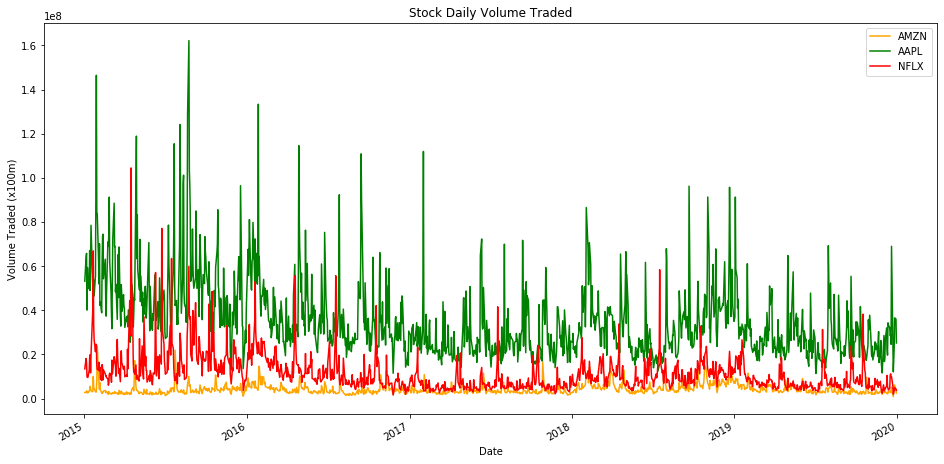

In [50]:
amzn_volume.plot(label='AMZN', color='orange', figsize=(16,8))
aapl_volume.plot(label='AAPL', color='green')
nflx_volume.plot(label='NFLX', color='red')
plt.title('Stock Daily Volume Traded')
plt.ylabel('Volume Traded (x100m)')
plt.legend()
plt.show()

*We can see that throughout this 5-year period, Apple stock is the most heavily traded on the vast majority of days, followed by Netflix, and then Amazon. In terms of average daily volume, Apple comes out on top with 35.9m shares traded per day, then Netflix at 11.5m, and Amazon at just 4.2m shares traded per day on average. Meanwhile, Apple hits a maximum in one day of 162.2m shares traded, with Netflix peaking at 104.5m, and Amazon well below at 23.9m. We must remember that we have to understand the context in which this data lies - Apple is trading the most, but it also has a vastly greater number of shares outstanding than Amazon and Netflix, so the best comparison to make is looking at a stocks volume against its price and observing how they move together. For instance, a surge in price and volume could indicate a continued bullish trend or bullish reversal, whereas a fall in price with a surge in volume could indicate a continued bearish trend or bearish reversal. Volume analysis can be a useful technical metric for inferring investor's outlook on a market or particular stock, and certain patterns or events can indicate where the price may go in the near future - hence we look at the peaks of each stock now, looking at the real-world events that have caused these spikes in trading.*

### Daily Trading Volume Maxima

The peaks of daily volume are particularly of interest, as they can represent major market or company events. I can find the date of maximum trading for each stock using the `idxmax()` function from `Pandas`, and thus gain an understanding of the real-world reasoning behind each particular peak:

**Amazon**

In [51]:
amzn_volume.idxmax() 

Timestamp('2015-01-30 00:00:00')

*Amazon has its peak daily trading volume on 30/01/15. This maximum occurred as share price increased over 14% due to the announcement of \\$214m net quarterly income, contrasted with the \\$437m net loss in previous Q. Thus we see the combination of a surge in price and volume, indicating the bullish trend reiterated by the company's positive earnings performance.*

**Apple**

In [52]:
aapl_volume.idxmax()

Timestamp('2015-08-24 00:00:00')

*Apple saw its peak volume on 24/08/15 - this was as the company had clawed back \\$78bn in market capitalisation which it had lost earlier in day due to "Black Monday" for Chinese equities, after a Tim Cook email insisting consumer demand in Apple's most important growth market remained "strong". So we have a spike in volume, combined with an increase in market cap which implies increase in share price (number of shares remaining fixed) - thus we see the reversal into bullish territory after the earlier losses sustained.*

**Netflix**

In [53]:
nflx_volume.idxmax()

Timestamp('2015-04-16 00:00:00')

*Finally, Netflix hits maximum daily trading on 16/04/15. This occurred as share prices increased over 11% after news of 4.9m new subscribers in Q1 2015 - showing the company's strength and levels of growth, with the increases in price and volume signifying the bullish trend of stock.*

### Daily Dollar Volume

I can also calculate the total daily money traded (known as the dollar volume or dollar volume liquidity) to see the dollar value of the stock trading activity in a day. This can be a particularly useful metric to institutional investors as they make such large trades - when a stock is highly liquid, it's easier to enter and exit your positions and have less of an impact on the stock's price. This total traded value is calculated as below:

$$ {\large Total\,Traded=p_{i}\cdot vol_{i} } $$ 
where:     
- $ \qquad p_{i}$ = Stock price in period i      
- $ \qquad vol_{i}$ = Volume traded over period i

First I isolate the open prices of each stock in variables, `stock_open`, to be used as the price value, then plot the total traded for each stock for comparison:

In [54]:
amzn_open = amzn_data['Open']
aapl_open = aapl_data['Open']
nflx_open = nflx_data['Open']
snp500_open = snp500_data['Open']

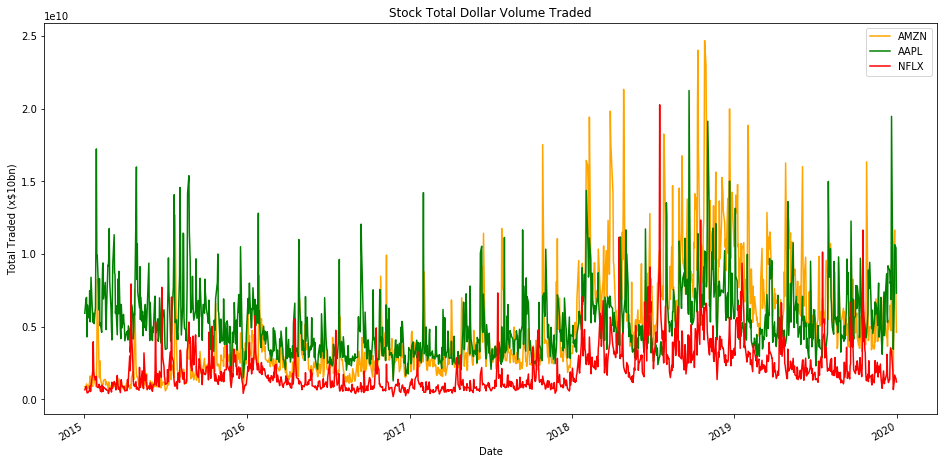

In [55]:
amzn_total_traded = amzn_open * amzn_volume
aapl_total_traded = aapl_open * aapl_volume
nflx_total_traded = nflx_open * nflx_volume

amzn_total_traded.plot(label='AMZN', color='orange', figsize=(16,8))
aapl_total_traded.plot(label='AAPL', color='green')
nflx_total_traded.plot(label='NFLX', color='red')
plt.title('Stock Total Dollar Volume Traded')
plt.ylabel('Total Traded (x$10bn)')
plt.legend()
plt.show()

*The graph for dollar volume is a little different to that of just volume - Apple tends to have the highest daily dollar volume for the first half of our time period, whereas Amazon tends to dominate the latter half. In terms of average dollar volume, Apple leads the way at \\$5.28bn daily, while Amazon averages \\$4.83bn, and Netflix \\$2.07bn. However, Amazon has the highest daily peak, hitting \\$24.68bn, with Apple's maximum at \\$21.25bn, and Netflix peaking at \\$20.27bn. Higher dollar volume is generally a positive sign, meaning there's significant interest in a stock as well as high levels of liquidity, however some investors who employ particular strategies may prefer stocks with lower dollar volume. Knowing how it is calculated, we can make inferences about the graph - if we only had the data for price and not volume, looking at our graph we could infer that, given Amazon having a sustained price multiple times higher than the other 2 stocks, Apple clearly has the highest volume, particularly in the initial period. Or if we only had the data for volume and not price, we could infer particularly from the second half of this graph that, given Amazon has far lower volume throughout, it must comfortably have the higher stock price in order to have the highest dollar volume over the latter half of this graph. Finally, a particular point of observation is the high levels of dollar volume towards the end of 2018, given that at this time the prices of each stock had a significant fall - this likely shows that investors were selling off their positions in these stocks, given the apparent downtrend of their prices.*

### Daily Dollar Volume Maxima

Again I look at the date of maximum for each stock, in this case maximum total traded. It will not necessarily be the same as the maximum for volume traded, as while the daily volume is still the same, the price is changing over time - hence the date of maximum trading volume doesn't necessarily equate to the date of maximum total traded. The maximum dollar traded for each stock can be seen below:

**Amazon**

In [56]:
amzn_total_traded.idxmax()

Timestamp('2018-10-26 00:00:00')

*Amazon hits its maximum dollar volume on 26/10/18. This was due to a Wall Street sell-off as well as growth jitters hitting tech stocks, causing Amazon share price to fall as much as 8% - hence we can infer that there was a surge in volume for the stock, likely from investors selling off and trying to retain as much of their investment as possible.*

**Apple**

In [57]:
aapl_total_traded.idxmax()

Timestamp('2018-09-21 00:00:00')

*Apple has its peak daily dollar volume on 21/09/18 - this happens to be the day of the release of the iPhone XS and XS Max. The volume of the stock was not especially high relative to the 5-year period, so this peak is mostly explained by the local peak in share price that Apple experienced at this time - as a result of the successful release of their latest iPhones.*

**Netflix**

In [58]:
nflx_total_traded.idxmax()

Timestamp('2018-07-17 00:00:00')

*Netflix's maximum dollar volume occurs on 17/07/18. This happens as the stock price tumbled as much as 14% as Netflix fell 1 million short of their forecast quarterly subscriber growth. Despite the sharp drop in share price, the maximum occurs as there is a local peak in volume traded, combined with the fact that the price was at its high point within the period before the drop. The maximum is attained as investors are likely selling off their stock due to the underwhelming performance reported by the company.*

-----

## Ordinary Least Squares Regression Analysis

### OLS Regression & Results

An Ordinary Least Squares (OLS) regression analysis between two stocks can gain more of an insight into their correlation and quantify the relationship between them. The regression analysis takes the daily returns data for 2 stocks - in this case Amazon and Apple - and gives some statistical metrics which can be used to understand the relationship between Amazon returns (the independent variable) and Apple returns (the dependent variable). I can then plot the regression line to give an estimate of the relationship between each stock's returns, in terms of a linear function. The OLS method estimates the relationship by minimising the sum of squares in the difference between the observed and predicted values of the dependent variable, configured as a straight line through the data points.

To run my OLS regression analysis, I first import the `api` for the `statsmodels` module. I then use the `fillna()` function from `Pandas` in order to fill in any gaps in the returns data, replacing any NA values with $0$ so that the analysis can be run without issue. I use the `add_constant()` function from `statsmodels` to set the Amazon daily returns as the constant in my model, and use its `OLS().fit()` functions to run the OLS regression and fit the results. Then printing the model summary prints the results as below:

In [59]:
import statsmodels.api as sm

amzn_daily_returns.fillna(0, inplace=True)
aapl_daily_returns.fillna(0, inplace=True)
X = sm.add_constant(amzn_daily_returns)
model = sm.OLS(aapl_daily_returns, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     402.3
Date:                Fri, 03 Jul 2020   Prob (F-statistic):           7.63e-78
Time:                        15:57:25   Log-Likelihood:                 3620.9
No. Observations:                1258   AIC:                            -7238.
Df Residuals:                    1256   BIC:                            -7228.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.805      0.4

### OLS Regression Results Analysis

Our OLS regression results above give some insight into the relationship between the returns of stocks:
- *R-squared, or the coefficient of determination, tells us how well the regression line approximates the real data points. In this case, 0.243 says that the line explains 24.3% of the variability of the response data (Apple's) around its mean*
- *F-statistic measures how significant the fit is, and the Prob(F-Statistic), or p-value, which is incredibly small in this case, effectively tells us to reject the null hypothesis that a simple model explains the variance in the dependent variable (Apple) better than the more complex model which we have used*
- *Coef is the estimated value of the coefficient of correlation, which is the gradient of the regression line. So the coefficient of 0.4182 between Amazon and Apple tells us the shape of regression line is of medium positive correlation*
- *Std err is the standard error of the estimate of the coefficient in absolute terms. Hence our standard error of 0.021 tells us that the average distance that the data falls from the regression line is 0.021, that is, on average each data point of daily returns is on average 2.1% away from the returns predicted by the regression line*
- *t is the known as the t-statistic and is another measure of significance of fit of the regression line. It is the coefficient divided by its standard error - giving us the value of 20.056 in this case*
- *P>|t|, or the P-value, is the important part of the t-distribution; our value of 0.000 tells us that the probability of getting a t-statistic as large as ours in a collection of random data in which the variable had no effect is 0.000. That is, there is a 0% chance of the results we see coming up in a random distribution, or 100% chance that the variable is having some effect*
- *Skew is a measure of the asymmetry of the data about its mean. A value of 0 tells you that the data is perfectly symmetrical about its mean (perfectly normally distributed), thus our value of -0.338 tells us that our distribution is approximately symmetric about the mean, though with a slightly negative skew*
- *Finally, Kurtosis gives an indication of the shape of the distribution, comparing the amount of the data close to the mean with those far away from it - that is, the height and sharpness of the central peak of our distribution. Hence, given that the kurtosis of a normal distribution is 0, our value of 8.178 of tells us the data has a much sharper peak than the normal distribution, given that ours has more data in the tails and a much sharper peak around the mean*

### OLS Regression Plot

Now given this analysis, I can plot the OLS regression line. I firstly plot the Amazon and Apple returns against each other, and set the argument `'r.'` to visualise the data points as red dots. I then explicitly add the axes to the plot in the `ax` variable, so that I can use the `linspace()` function from `NumPy` to initialise `x`, where `ax[0]` is the y-axis, and `ax[1]` is the x-axis. Finally, I plot the regression line, where `model.params` gives the coefficients, and the argument `lw` sets the line width:

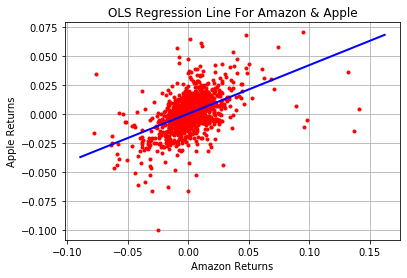

In [60]:
plt.plot(amzn_daily_returns, aapl_daily_returns, 'r.')
ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.params[0] + model.params[1] * x, color='blue', lw=2)

plt.title('OLS Regression Line For Amazon & Apple')
plt.xlabel('Amazon Returns')
plt.ylabel('Apple Returns')
plt.axis('tight')
plt.grid(True)
plt.show()

*Here we see the regression line plotted through our data for Amazon and Apple returns. As we have our coefficient value of 0.4182, we know that this is the gradient of our line - that is, for every 1% increase in Amazon returns, our regression line predicts a 0.4182% increase in Apple returns. We can see that the line gives a rough estimate of a linear relationship between the returns of the two stock, though there are a number of outliers which may affect the significance of this line, as well as its gradient. However, it is at least a good starting point in allowing us to predict the returns of one of the stocks, given that we only know the returns of the other.*

### Rolling Correlation Of Returns

Finally, I can plot the rolling correlation of returns - the correlation of rolling returns between Amazon and Apple over time. I've set the rolling window `window=252`, as 252 is the number of trading days in a year, and called `corr(amzn_daily_returns)` on Apple's daily returns to get their correlation. So below is plotted the 1 year rolling correlation of returns between the 2 stocks:

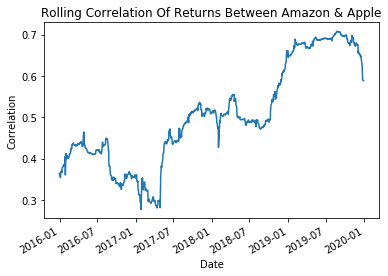

In [61]:
aapl_daily_returns.rolling(window=252).corr(amzn_daily_returns).plot()
plt.title('Rolling Correlation Of Returns Between Amazon & Apple')
plt.ylabel('Correlation')
plt.show()

*Each data point on the graph shows us the correlation between the returns of Amazon and Apple for the 1-year period preceding it. We can see a general uptrend in their rolling correlation, albeit with a few periods of lessened correlation. We found earlier that the correlation between Amazon and Apple returns over the 5-year period was +0.493, so it's interesting to see how the rolling correlation changes over this time - in the first half of our analysis it tends to be below that level, but in the second half it is generally above it, particularly in the final year and a half. Thus we have a more fluid look at how the correlation looked at different times in our period, rather than just having an overall average number.*

----

## Stock Analysis Conclusion

My analysis over the 5 year historical period from 01/01/2015 to 31/12/19 has shown some clear differences, strengths, weaknesses, and also some degree of relationship between the stocks of Amazon, Apple, and Netflix: 

While Netflix has the highest level of cumulative returns in terms of multiplying an initial investment, it is Amazon stock which sees the highest absolute dollar gain over the period. Taking volatility and risk into account however, I have seen that Netflix is generally the most volatile of the stocks, with Apple, although having the lowest returns overall, is also the least volatile and risky of the three. Meanwhile, Apple has the overall highest volume and dollar volume of the stocks, thus it has the highest liquidity, and this may sway the preference of a larger institutional investor towards the company. Furthermore, Apple and Amazon have a much larger market capitalisation over this period than Netflix, so this is something that must be taken into account in terms of comparison and inference. Hence, looking at different technical metrics and analyses, there is a case to be made for each stock, particularly as each comfortably out-performs the market as a whole over this period - it very much depends on the investor's preferences and what stock they may already be holding.

It is also important to note that there are other important factors to be looked at when analysing a stock, which aren't covered in this project. For instance, looking at a company's financial statements, earnings and revenue growth prospects are a part of fundamental analysis which should not be overlooked; nor should management or general company news, for instance any legal proceedings could have a profound effect on future financials. There are also other technical indicators which I haven't covered, like dividends or ratios such as earnings-per-share, which can give a strong comparative tool when looking at a number of stocks. The overall economic conditions are hugely relevant, as well as industry trends - the stocks I have chosen are all within the technology sector, and so are likely to have some level of correlation as I have seen from the analysis, although there is difference in industry between say Amazon and Netflix; thus it's important to compare with other industry-relevant stocks.

Overall, it is clear that there is a case for investment in each of the 3 stocks analysed to be made, particularly as all of them provide excess returns relative to the market. It is thus dependent on the size and preferences of the investor as to whether to purchase each stock, as well as to look at metrics like beta to understand how each stock would fit into their portfolio and affect the risk-reward profile of their investments as a whole.

----------------------------------------------------------------------------------------------------------------------

## Portfolio Analysis

### Portfolio Data 

Now I can run some analysis on the performance of an equally-weighted portfolio of the 3 stocks, and compare it to the market index. 

First, I create variables for each of the different portfolio values I need so that I have them accessible and uniformly defined:

In [62]:
ptflo_adj_close = (amzn_adj_close + aapl_adj_close + nflx_adj_close) / 3
ptflo_close = (amzn_close + aapl_close + nflx_close) / 3
ptflo_high = (amzn_high + aapl_high + nflx_high) / 3
ptflo_low = (amzn_low + aapl_low + nflx_low) / 3

ptflo_daily_returns = (amzn_daily_returns + aapl_daily_returns + nflx_daily_returns) / 3
ptflo_cum_daily_returns = (1 + ptflo_daily_returns).cumprod()

### Stacked Histogram Of Simple Daily Returns

I then plot a stacked histogram of the frequency of simple daily returns for the portfolio compared to the S&P 500 market index:

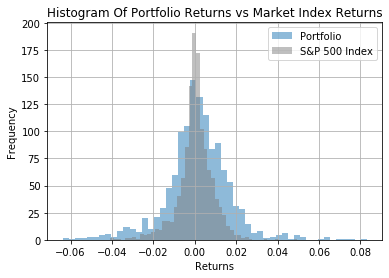

In [63]:
ptflo_daily_returns.hist(label='Portfolio', bins=50, alpha=0.5)
snp500_daily_returns.hist(label='S&P 500 Index', bins=50, color='grey', alpha=0.5)
plt.title('Histogram Of Portfolio Returns vs Market Index Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

*Our stacked histogram once again gives us a clear and direct visual comparison, this time between the portfolio and the index. We see that the histogram for the market index has the higher peak, whilst the portfolio is shorter - hence the index has more of its daily returns concentrated about its mean, and close to 0%. However, the portfolio has a much wider distribution of data, with more outliers or instances of excess returns and losses, thus implying its volatility of price activity is higher than that of the market. Overall, both are relatively symmetrical with no clear skew either way, thus the major difference is mostly to do with the concentration of the returns about the mean, that is, the kurtosis of each histogram. These results are expected due to the higher inherent diversification of the market index, making it less risky or prone to major fluctuations in returns.*

### Box Plot Of Simple Daily Returns

Next a box plot comparison of simple daily returns, so that key statistics can be visualised and interpreted:

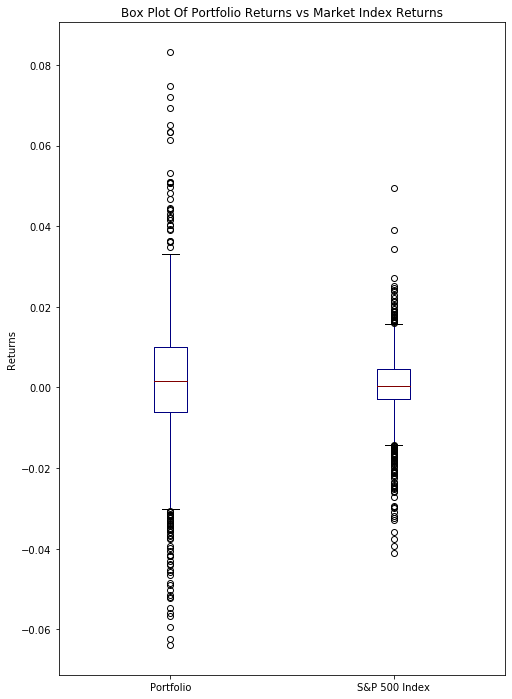

In [64]:
box_df_ptflo = pd.concat([ptflo_daily_returns, snp500_daily_returns], axis=1)
box_df_ptflo.columns = ['Portfolio', 'S&P 500 Index']
box_df_ptflo.plot(kind='box', colormap='jet', figsize=(8,12))
plt.title('Box Plot Of Portfolio Returns vs Market Index Returns')
plt.ylabel('Returns')
plt.show()

*Our box plot comparison of the daily returns shows a vast difference between the two. The median returns (red line) for each are quite similar, with the portfolio's being 0.16%, whilst the market's is 0.05%. However, the spread either side of the median is the clear difference in performance between the two - the interquartile range of the portfolio is 1.62%, whereas that of the index is only 0.76%, so the middle half of the distribution of returns of the portfolio is spread over more than twice the range of that of the index. While we cannot easily grasp the number of outliers for each from our boxplot, we can see clearly that the outliers for the portfolio lie much further from the median than those of the index - hence there are more instances of excess returns or losses with the portfolio. The maximum daily return for the portfolio is 8.32%, whereas it's 5.00% for the index, however the greatest daily loss for the portfolio is -6.39%, whereas it's only -4.10% for the index. Thus overall we can say that the portfolio has a much higher volatility of returns than the index, so it has higher levels of risk but also higher potential for excess returns.*

### Simple Moving Averages

Now a moving averages comparison for the portfolio:

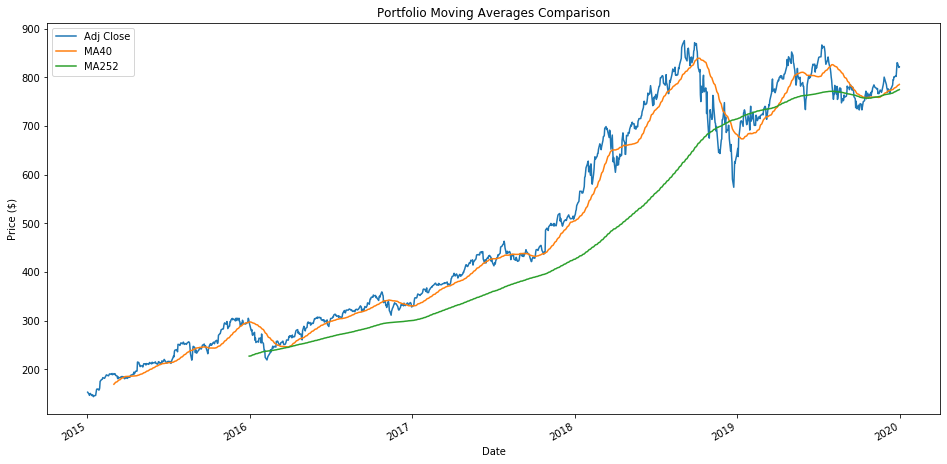

In [65]:
short_window = 40
long_window = 252
ptflo_short_moving_avg = ptflo_adj_close.rolling(short_window).mean()
ptflo_long_moving_avg = ptflo_adj_close.rolling(long_window).mean()

ptflo_adj_close.plot(label='Adj Close', figsize=(16,8))
ptflo_short_moving_avg.plot(label='MA'+str(short_window))
ptflo_long_moving_avg.plot(label='MA'+str(long_window))
plt.title('Portfolio Moving Averages Comparison')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

*The adjusted close price of the portfolio is generally above the moving averages, telling us that the price will generally increase over time as we see overall through the 5 years. However, there is a particular period towards the end of 2018 where the price dips below the short and eventually long moving average, implying the price will drop, as it does for a few months before somewhat stabilising. Despite this sharp fall in the price and short term moving average, the long term moving average holds steady, albeit flattening somewhat - telling us that the long term trend is still holding positive. Again we look to see the points where the long and short moving averages crossover, giving trading signals on whether to buy or sell the stock. There are 4 points of moving average crossover: on 17/12/18 the long moving average crosses above the short moving average which would trigger a sell signal for the portfolio, then they crossover again on 03/04/19, triggering a buy signal. They cross once more on 07/11/19 indicating to a trader to sell again, and then finally for the last time on 25/11/19, triggering a last buy signal for the portfolio.*

### Bollinger Bands

Plotting the price of the portfolio with Bollinger Bands allows me to analyse periods of under and over trading:

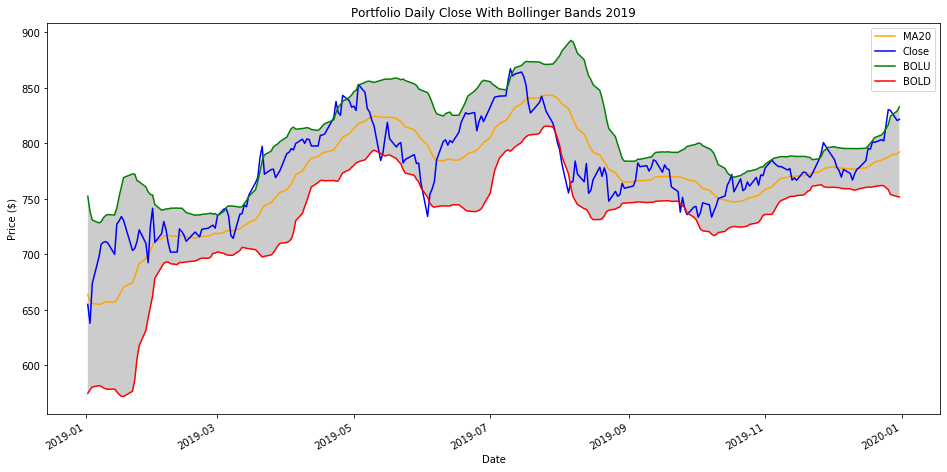

In [66]:
window = 20
no_of_std = 2
ptflo_typical_price = ((ptflo_high.loc['2018-12-01':'2019-12-31'] 
                       + ptflo_low.loc['2018-12-01':'2019-12-31'] 
                       + ptflo_close.loc['2018-12-01':'2019-12-31']) 
                       / 3)
ptflo_bollinger_moving_avg = ptflo_typical_price.rolling(window).mean()
ptflo_bollinger_moving_avg_std = ptflo_typical_price.rolling(window).std()
ptflo_upper_bollinger = ptflo_bollinger_moving_avg + (no_of_std * ptflo_bollinger_moving_avg_std)
ptflo_lower_bollinger = ptflo_bollinger_moving_avg - (no_of_std * ptflo_bollinger_moving_avg_std)

ptflo_bollinger_moving_avg.plot(label='MA'+str(window), color='orange', figsize=(16,8))
ptflo_close.loc['2019-01-01':'2019-12-31'].plot(label='Close', color='blue')
ptflo_upper_bollinger.plot(label='BOLU', color='green')
ptflo_lower_bollinger.plot(label='BOLD', color='red')
plt.title('Portfolio Daily Close With Bollinger Bands 2019')
plt.ylabel('Price ($)')
plt.fill_between(
        ptflo_bollinger_moving_avg.index, ptflo_lower_bollinger, ptflo_upper_bollinger, facecolor='grey', 
        alpha=0.4)
plt.legend()
plt.show()

*The close price of the portfolio regularly fluctuates above and below the moving average, although stays above or below for longer periods earlier on in the year, before crossing over more regularly later on. There is a particularly lengthy period from March to May where the price hugs the upper band, meaning the market is overbought and the price rises, which is followed by a shorter period where the price hugs the lower band implying the portfolio is oversold and so the price falls. This happens at the start of May, where the price rapidly moves from the upper band to the lower band - indicating a short term trend reversal. Throughout the year, the bands are generally quite narrow, meaning there is a relatively low level of volatility of the price, however for the first month or so the bands are much wider showing a time of high volatility before it stabilises. There are a few breakouts from the bands, but although these are significant events, each of them is relatively minor and short lasting.*

### Cumulative Daily Returns

I plot the cumulative daily returns for the portfolio vs the market index to see how an initial investment would evolve over the 5-year period:

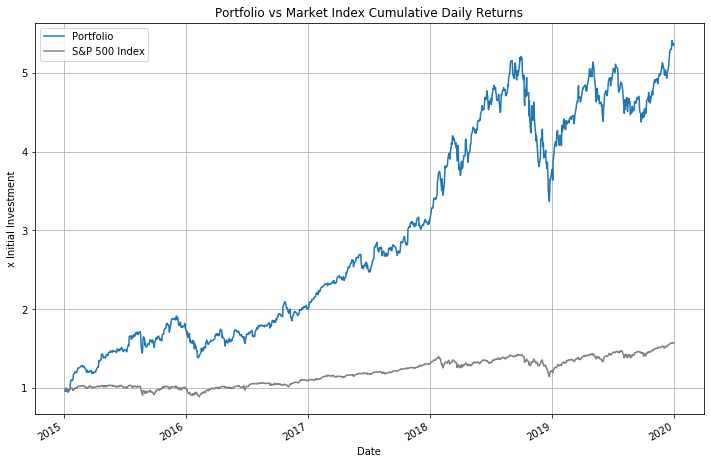

In [67]:
ptflo_cum_daily_returns.plot(label='Portfolio', figsize=(12,8))
snp500_cum_daily_returns.plot(label='S&P 500 Index', color='grey')
plt.title('Portfolio vs Market Index Cumulative Daily Returns')
plt.ylabel('x Initial Investment')
plt.legend()
plt.grid(True)
plt.show()

*Clearly we can see that our portfolio of stocks well out-performed the market during these 5 years - you would have multiplied your investment 5.4x had you bought the portfolio on 01/01/15 and held onto it until 31/12/19, with it peaking in value just before the end of the period on 26/12/19. Meanwhile, had you held onto the market as a whole would have multiplied your initial investment just 1.6x, with that being the peak level of cumulative returns - albeit still healthy positive returns over a 5-year period. Interestingly, there are periods during 2015 and 2016 where you would have made a loss on the market as a whole as well. There is a particularly severe drop in value towards the end of 2018, where our portfolio loses nearly 40% of its value, although making this back up over the next year - this sharp drop shows the shortfall in diversification of our portfolio, as all of the 3 stocks in it saw losses at this time, further showing their positive correlation and the need for negatively correlated stocks to reduce the overall risk. This also leads on to the fact that the portfolio sees a lot more deviations, that is volatility of returns, over the period - showing the market as a whole is somewhat more secure and less prone to systematic losses.*

### Compound Annual Growth Rate

The portfolio Compound Annual Growth Rate (CAGR) tells me the annual growth rate required for the portfolio to reach its final value over the period I've analysed:

In [68]:
ptflo_days = (amzn_data.index[-1] - amzn_data.index[0]).days
ptflo_initial = (amzn_adj_close[1] + aapl_adj_close[1] + nflx_adj_close[1]) / 3
ptflo_final = (amzn_adj_close[-1] + aapl_adj_close[-1] + nflx_adj_close[-1]) / 3
n = ptflo_days / 365.0

ptflo_cagr = ((ptflo_final / ptflo_initial) ** (1 / n)) - 1
ptflo_cagr

0.40735781547246175

*The compound annual growth rate of our portfolio shows a very strong average annual growth rate of +40.7%; well above the CAGR of the market which stands at an albeit good level of +9.9% over the 5 years. It is also well above Apple's CAGR of +24.7% too, and not too far off those of Amazon (+43.7%) and Netflix (+46.9%), despite the diversification benefits the portfolio gives.*

### Moving Historical Volatility

Finally, I plot the moving historical volatility for the portfolio vs the market index to ascertain the risk levels over time of each potential investment:

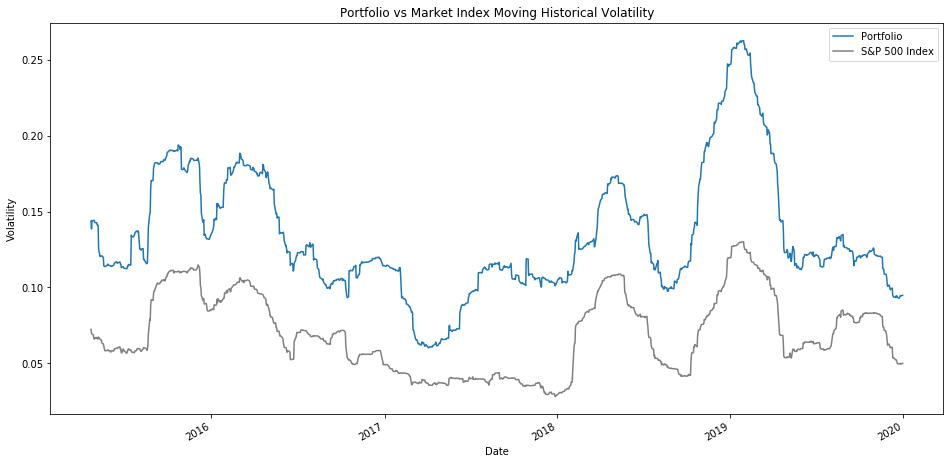

In [69]:
min_periods = 75
ptflo_volatility = ptflo_daily_returns.rolling(min_periods).std() * np.sqrt(min_periods) 
snp500_volatility = snp500_daily_returns.rolling(min_periods).std() * np.sqrt(min_periods)

ptflo_volatility.plot(label='Portfolio', figsize=(16,8))
snp500_volatility.plot(label='S&P 500 Index', color='grey')
plt.title('Portfolio vs Market Index Moving Historical Volatility')
plt.ylabel('Volatility')
plt.legend()
plt.show()

*Again with this graph we can see the effects of diversification - the inherent diversification of the market index means that it stays below our portfolio in terms of moving historical volatility throughout the 5-year period. However, our portfolio does show benefits of some diversification, given that is less volatile than Netflix stock by itself in particular, whilst frequently dropping below Amazon and being somewhat similar to Apple's level of volatility. Once again we also see a clear level of correlation between the volatilities of these 2 graphs, seen by the regular rise and falls in somewhat synchronicity, and particularly in early 2019 where there is a great surge. Intriguingly, both the portfolio and the market see their peak value of volatility on 29/01/19, with the portfolio's at 26.3% and the market's at 13.0%. This shows that volatility can still see surges in certain economic conditions, despite high levels of diversification in an investor's holdings.*

---

## Portfolio Analysis Conclusion

The brief analysis of the equally-weighted portfolio of Amazon, Apple and Netflix versus the market index gives a clear picture of comparison with the market overall over the 5-year period between 01/01/15 and 31/12/19:

The portfolio has a much larger cumulative return over the period than the market as a whole, though has a higher volatility and risk level attached to it, with a wider distribution of daily returns both positively and negatively. The significant part is that the portfolio improves diversification and lowers risk overall for the holder compared to owning any of the 3 stocks analysed on their own, whilst also delivering very strong returns both in terms of multiplying original investment and in absolute dollar values.

As mentioned with the stock analysis, there are many other factors to look at in relation to company news and other financial data, as well as understanding the economic conditions as a whole, while viewing the portfolio in the context of the investor's preferences and other holdings.

So overall, the portfolio of the 3 stocks again well out-performs the market over this time period, with the additional benefits of some diversification, although this can be improved with more negatively correlated stocks from other industries, for example - hence this portfolio will see greater benefits to some than others in terms of balancing the risk and reward of their holdings, rather than just looking at the returns in isolation.